In [1]:
# if you dont have sweetviz
# !conda install sweetviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## Step 1 : Reading the Data

In [5]:
data = pd.read_csv("data/train.csv")

In [6]:
data.shape

(1460, 81)

In [7]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#import sweetviz as sv

#univariateReport = sv.analyze(data)
#univariateReport.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [11]:
#bivariateReport= sv.analyze(data,
#            target_feat = "SalePrice",
#            pairwise_analysis = 'on')
#bivariateReport.show_notebook()

## Step 2 : Data Cleaning

### Step 2.1 : NullValueHandling : Columns to drop

In [12]:
def identifyColumnsToDrop(df, percentageNullsAllowed=20):
    nullcounts = pd.DataFrame(df.isnull().sum()).reset_index()
    nullcounts.columns = ["column","null_count"]
    totalRecords = df.shape[0]
    totalNullsAllowed = totalRecords*percentageNullsAllowed/100
    print("Nulls allowed = \n", totalRecords, totalNullsAllowed)
    n = nullcounts[nullcounts["null_count"] > totalNullsAllowed]
    n['null%'] = n['null_count']*100/totalRecords
    return n

In [13]:
columnsWithMostlyNullValues = identifyColumnsToDrop(data,80)
columnsWithMostlyNullValues.sort_values(by="null_count", ascending=False,inplace=True)
columnsWithMostlyNullValues.head(20)

Nulls allowed = 
 1460 1168.0


column  null_count      null%
72       PoolQC        1453  99.520548
74  MiscFeature        1406  96.301370
6         Alley        1369  93.767123
73        Fence        1179  80.753425

In [14]:
for column in columnsWithMostlyNullValues['column'].values:
    print("ColumnName : "+column,"\n")
    print(data[column].value_counts())
    
    print("______________")

ColumnName : PoolQC 

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
______________
ColumnName : MiscFeature 

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
______________
ColumnName : Alley 

Grvl    50
Pave    41
Name: Alley, dtype: int64
______________
ColumnName : Fence 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
______________


In [15]:
columnsWithMostlyNullValues = identifyColumnsToDrop(data,80)
columnsWithMostlyNullValues.sort_values(by="null_count", ascending=False,inplace=True)
columnsWithMostlyNullValues.head(20)

Nulls allowed = 
 1460 1168.0


column  null_count      null%
72       PoolQC        1453  99.520548
74  MiscFeature        1406  96.301370
6         Alley        1369  93.767123
73        Fence        1179  80.753425

In [16]:
data.drop(columns=columnsWithMostlyNullValues['column'].values,axis=1, inplace=True)

### 2.2 NullValueHandling: null values Imputations 

In [17]:
columnsWithMostlyNullValues = identifyColumnsToDrop(data.select_dtypes(include=['string','object']),0.0001)
columnsWithMostlyNullValues.sort_values(by="null_count", ascending=False,inplace=True)
columnsWithMostlyNullValues.head(20)

Nulls allowed = 
 1460 0.0014600000000000001


column  null_count      null%
31   FireplaceQu         690  47.260274
32    GarageType          81   5.547945
33  GarageFinish          81   5.547945
34    GarageQual          81   5.547945
35    GarageCond          81   5.547945
22  BsmtExposure          38   2.602740
24  BsmtFinType2          38   2.602740
20      BsmtQual          37   2.534247
21      BsmtCond          37   2.534247
23  BsmtFinType1          37   2.534247
16    MasVnrType           8   0.547945
28    Electrical           1   0.068493

In [18]:
for column in columnsWithMostlyNullValues['column'].values:
    print("ColumnName : "+column,"\n")
    print(data[column].value_counts())
    data[column]= data[column].fillna('None')
    print("______________")

ColumnName : FireplaceQu 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
______________
ColumnName : GarageType 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
______________
ColumnName : GarageFinish 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
______________
ColumnName : GarageQual 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
______________
ColumnName : GarageCond 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
______________
ColumnName : BsmtExposure 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
______________
ColumnName : BsmtFinType2 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
______________
ColumnName : BsmtQual 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: 

In [19]:
columnsWithMostlyNullValues = identifyColumnsToDrop(data.select_dtypes(exclude=['string','object']),0.0001)
columnsWithMostlyNullValues.sort_values(by="null_count", ascending=False,inplace=True)
columnsWithMostlyNullValues.head(20)

Nulls allowed = 
 1460 0.0014600000000000001


column  null_count      null%
2   LotFrontage         259  17.739726
25  GarageYrBlt          81   5.547945
8    MasVnrArea           8   0.547945

In [20]:
MasVnrAreaNonzero = data.MasVnrArea[~(data.MasVnrArea==0)]
print("MasVnrArea :",MasVnrAreaNonzero.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, MasVnrAreaNonzero.median())

MasVnrArea : count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [21]:
##Impute the null values with median value for 'LotFrontage' columns
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())

In [22]:
##Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below
data['GarageYrBlt']= data['GarageYrBlt'].fillna(0).astype(int) 

In [23]:
data.isnull().sum().sum()

0

### Step 2.3 : drop duplicates

In [24]:
data.drop_duplicates(inplace=True)
data.shape

(1460, 77)

### Step 2.4 : drop unique valued columns

In [25]:
data.nunique().sort_values()

Utilities           2
CentralAir          2
Street              2
LandSlope           3
BsmtHalfBath        3
HalfBath            3
PavedDrive          3
LotShape            4
LandContour         4
FullBath            4
GarageFinish        4
ExterQual           4
BsmtFullBath        4
Fireplaces          4
MasVnrType          4
KitchenAbvGr        4
KitchenQual         4
HeatingQC           5
BsmtCond            5
BsmtQual            5
ExterCond           5
BsmtExposure        5
YrSold              5
BldgType            5
GarageCars          5
LotConfig           5
MSZoning            5
SaleCondition       6
FireplaceQu         6
Foundation          6
GarageQual          6
Electrical          6
GarageCond          6
RoofStyle           6
Heating             6
Functional          7
GarageType          7
BsmtFinType2        7
BsmtFinType1        7
Condition2          8
PoolArea            8
BedroomAbvGr        8
HouseStyle          8
RoofMatl            8
OverallCond         9
SaleType  

In [26]:
data.drop("Id",axis=1, inplace=True)

In [27]:
### Step 2.5 : 

### Step 2.6 : Type conversions

In [28]:
data[['MSSubClass']] = data[['MSSubClass']].astype('object')
data[['MoSold']] = data[['MoSold']].astype('object')

### 2.7 Derive new features

In [29]:
def categorizeRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check

In [30]:
# We can derive age using year columns
# derive house age = 1900 - year build
data["property_age"] = data["YearBuilt"] -1900
# derive house age when sold 
data["property_age_when_sold"] = data["YrSold"] - data["YearBuilt"]
# derive garage age = 1900 - year build
data["garage_age"] = data["GarageYrBlt"].apply(lambda x: x-1900 if x > 0 else 0)
# derive column to identify if the house was remodelled after built
data["if_remodelled"] = data.apply(categorizeRemodel, axis=1)

In [31]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

data = data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','2ndFlrSF'], axis = 1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0     8450   Pave      Reg         Lvl   
1         20       RL         80.0     9600   Pave      Reg         Lvl   
2         60       RL         68.0    11250   Pave      IR1         Lvl   
3         70       RL         60.0     9550   Pave      IR1         Lvl   
4         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1       

### 2.8 remove the features which have single significant value 
occupying 98% of the records

In [32]:
##Removing features that have more than 80% data associated to one single value.

def get_cols_imbal(df1, prcnt):
    my_list= []
    cols = df1.columns
    print("cols to iterate",cols)
    for col in cols:
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_cols_imbal(df1=data, prcnt=85)  
print("features:",len(num_cols_to_be_removed), num_cols_to_be_removed)

cols to iterate Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',


In [33]:
data[num_cols_to_be_removed]

Street LandContour Utilities LandSlope Condition1 Condition2 RoofMatl  \
0      Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
1      Pave         Lvl    AllPub       Gtl      Feedr       Norm  CompShg   
2      Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
3      Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
4      Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
...     ...         ...       ...       ...        ...        ...      ...   
1455   Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
1456   Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
1457   Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
1458   Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   
1459   Pave         Lvl    AllPub       Gtl       Norm       Norm  CompShg   

     ExterCond BsmtCond BsmtFinType2  BsmtFinSF2 Heating CentralAir  \
0           TA       TA          Unf           0    GasA          Y   
1           TA       TA          Unf           0    GasA          Y   
2           TA       TA          Unf           0    GasA          Y   
3           TA       Gd          Unf           0    GasA          Y   
4           TA       TA          Unf           0    GasA          Y   
...        ...      ...          ...         ...     ...        ...   
1455        TA       TA          Unf           0    GasA          Y   
1456        TA       TA          Rec         163    GasA          Y   
1457        Gd       Gd          Unf           0    GasA          Y   
1458        TA       TA          Rec        1029    GasA          Y   
1459        TA       TA          LwQ         290    GasA          Y   

     Electrical  LowQualFinSF  BsmtHalfBath  KitchenAbvGr Functional  \
0         SBrkr             0             0             1        Typ   
1         SBrkr             0             1             1        Typ   
2         SBrkr             0             0             1        Typ   
3         SBrkr             0             0             1        Typ   
4         SBrkr             0             0             1        Typ   
...         ...           ...           ...           ...        ...   
1455      SBrkr             0             0             1        Typ   
1456      SBrkr             0             0             1       Min1   
1457      SBrkr             0             0             1        Typ   
1458      FuseA             0             0             1        Typ   
1459      SBrkr             0             0             1        Typ   

     GarageQual GarageCond PavedDrive  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            TA         TA          Y              0          0            0   
1            TA         TA          Y              0          0            0   
2            TA         TA          Y              0          0            0   
3            TA         TA          Y            272          0            0   
4            TA         TA          Y              0          0            0   
...         ...        ...        ...            ...        ...          ...   
1455         TA         TA          Y              0          0            0   
1456         TA         TA          Y              0          0            0   
1457         TA         TA          Y              0          0            0   
1458         TA         TA          Y            112          0            0   
1459         TA         TA          Y              0          0            0   

      PoolArea  MiscVal SaleType  
0            0        0       WD  
1            0        0       WD  
2            0        0       WD  
3            0        0       WD  
4            0        0       WD  
...        ...      ...      ...  
1455         0        0       WD  
1456         0        0       WD  
1457         0     2500       WD  
1458         0        0       WD  
1459

In [34]:
for col in num_cols_to_be_removed:
    print(data[col].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       

In [35]:
data.drop(num_cols_to_be_removed, axis=1, inplace=True)

In [36]:
categorical_features = data.select_dtypes(include=['string','object']).columns
numerical_features = data.select_dtypes(exclude=['string','object']).columns

### 2.9 outliers treatment

In [37]:
##Check outliers
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082     6.099315     5.575342   104.229452   
std      22.027677    9981.264932     1.382997     1.112799   180.717988   
min      21.000000    1300.000000     1.000000     1.000000     0.000000   
10%      49.000000    5000.000000     5.000000     5.000000     0.000000   
25%      60.000000    7553.500000     5.000000     5.000000     0.000000   
50%      69.000000    9478.500000     6.000000     5.000000     0.000000   
75%      79.000000   11601.500000     7.000000     6.000000   168.000000   
95%     104.000000   17401.150000     8.000000     8.000000   456.000000   
98%     120.820000   25251.620000     9.000000     8.000000   650.820000   
99%     137.410000   37567.640000    10.000000     9.000000   791.280000   
100%    313.000000  215245.000000    10.000000     9.000000  1600.000000   
max     313.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726   567.240411  1057.429452  1162.626712  1515.463699   
std     456.098091   441.866955   438.705324   386.587738   525.480383   
min       0.000000     0.000000     0.000000   334.000000   334.000000   
10%       0.000000    74.900000   636.900000   756.900000   912.000000   
25%       0.000000   223.000000   795.750000   882.000000  1129.500000   
50%     383.500000   477.500000   991.500000  1087.000000  1464.000000   
75%     712.250000   808.000000  1298.250000  1391.250000  1776.750000   
95%    1274.000000  1468.000000  1753.000000  1831.250000  2466.100000   
98%    1442.640000  1678.200000  2001.640000  2072.280000  2782.380000   
99%    1572.410000  1797.050000  2155.050000  2219.460000  3123.480000   
100%   5644.000000  2336.000000  6110.000000  4692.000000  5642.000000   
max    5644.000000  2336.000000  6110.000000  4692.000000  5642.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.425342     1.565068     0.382877      2.866438      6.517808   
std        0.518911     0.550916     0.502885      0.815778      1.625393   
min        0.000000     0.000000     0.000000      0.000000      2.000000   
10%        0.000000     1.000000     0.000000      2.000000      5.000000   
25%        0.000000     1.000000     0.000000      2.000000      5.000000   
50%        0.000000     2.000000     0.000000      3.000000      6.000000   
75%        1.000000     2.000000     1.000000      3.000000      7.000000   
95%        1.000000     2.000000     1.000000      4.000000     10.000000   
98%        1.000000     3.000000     1.000000      4.000000     10.820000   
99%        2.000000     3.000000     1.000000      5.000000     11.000000   
100%       3.000000     3.000000     2.000000      8.000000     14.000000   
max        3.000000     3.000000     2.000000      8.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
10%       0.000000     1.000000   240.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
95%       2.000000     3.000000   850.100000   335.000000   175.050000   
98%       2.000000     3.000000   907.460000   430.100000   240.820000   
99%       2.

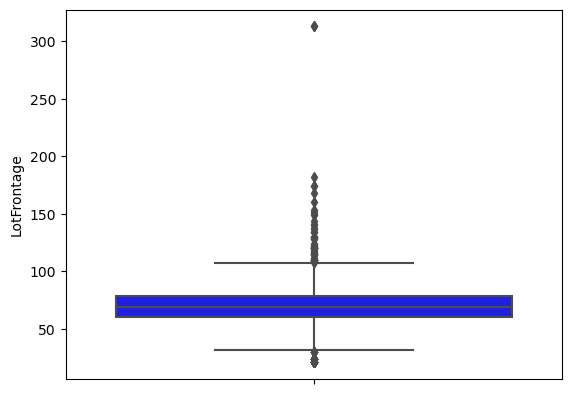

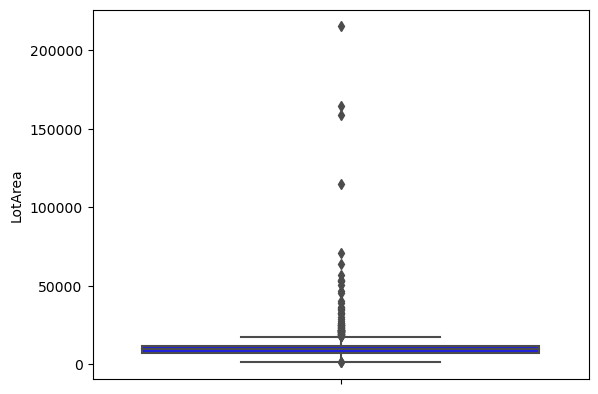

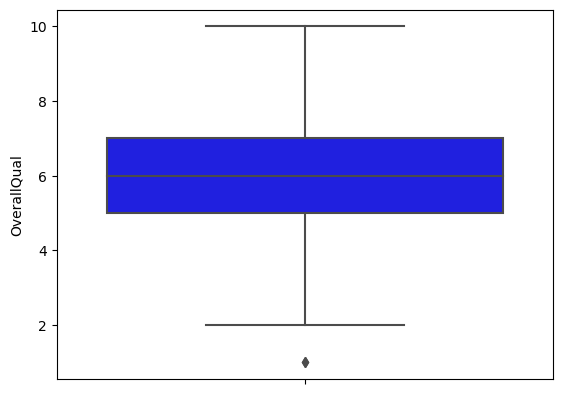

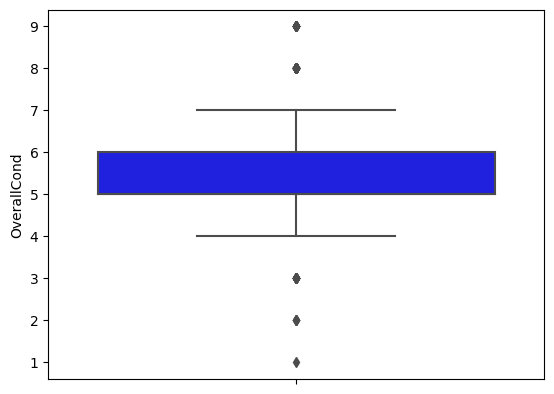

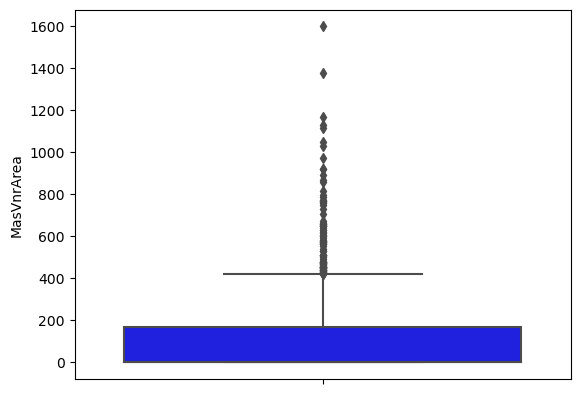

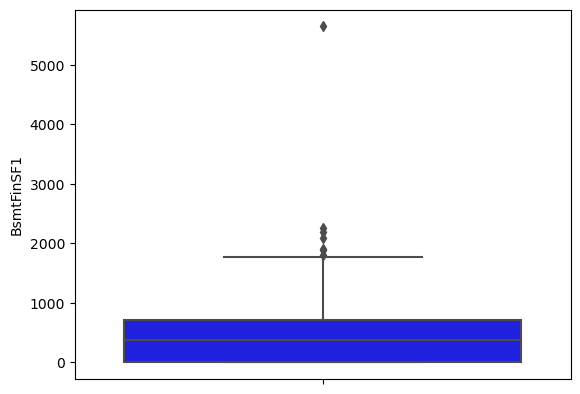

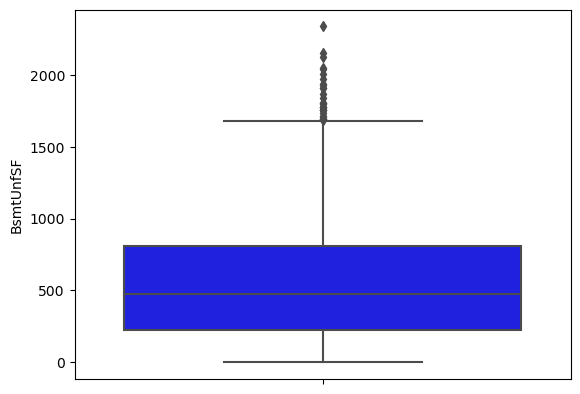

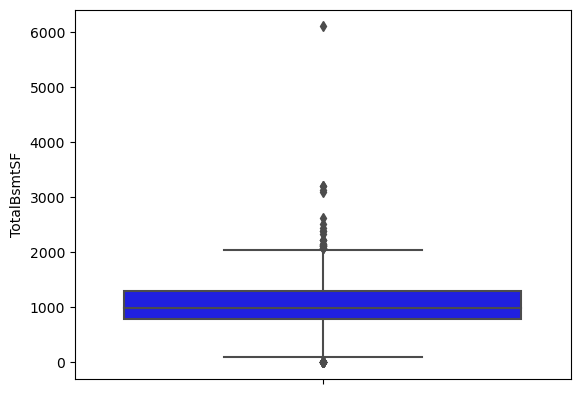

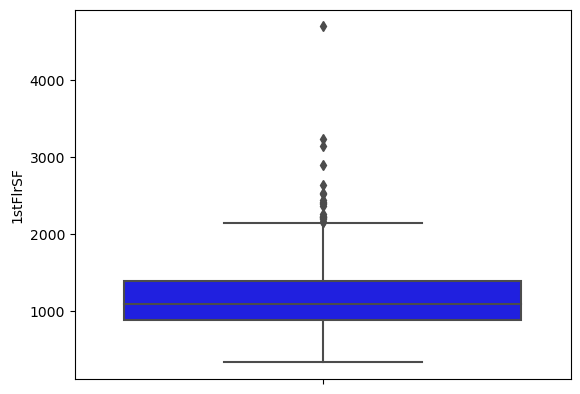

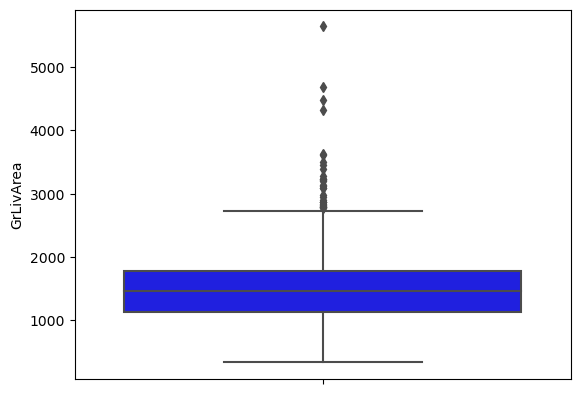

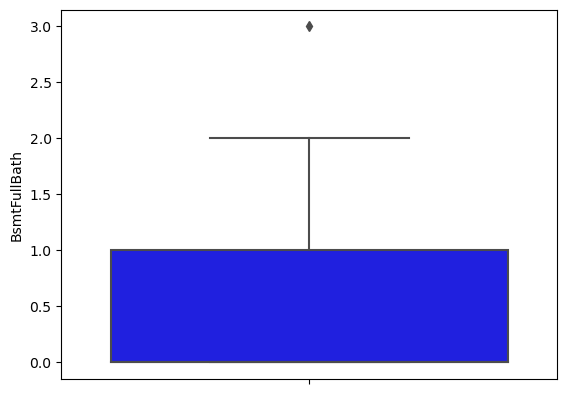

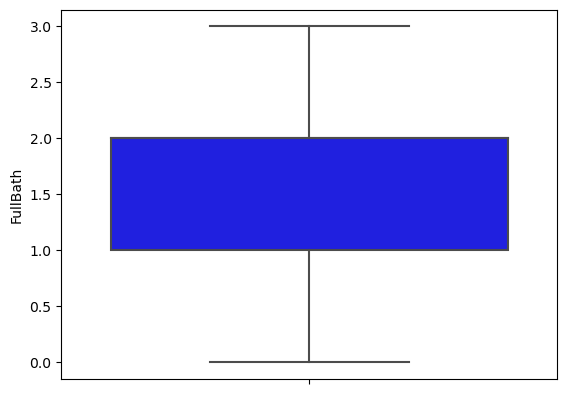

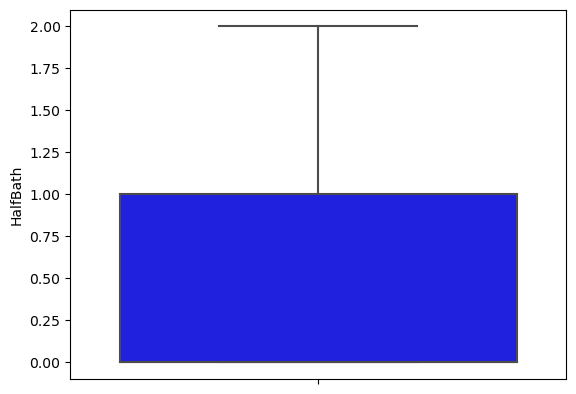

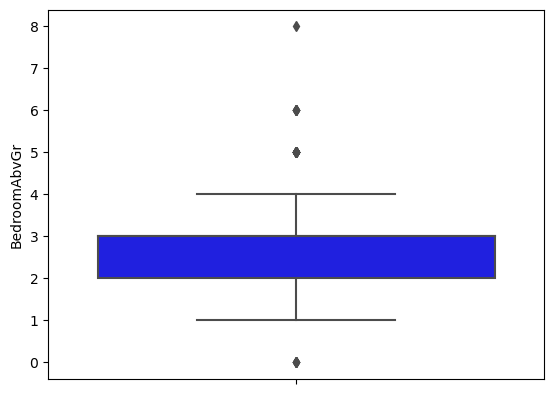

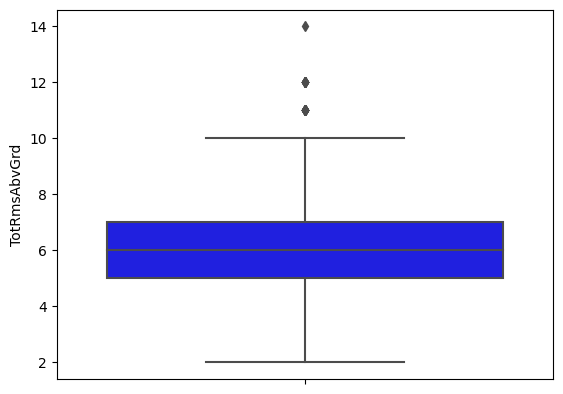

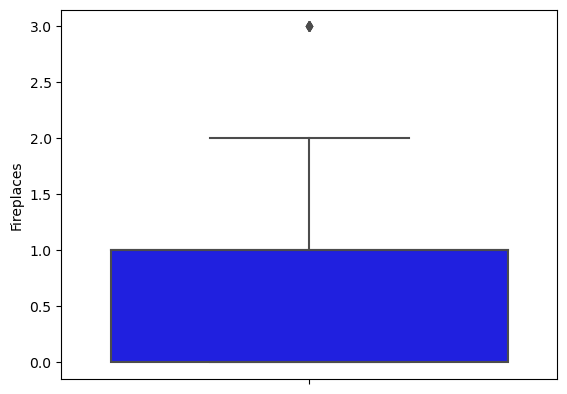

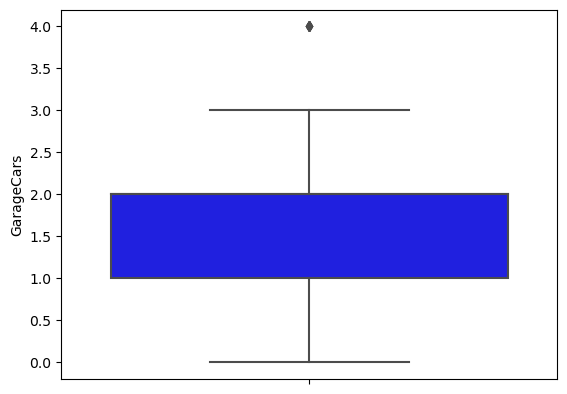

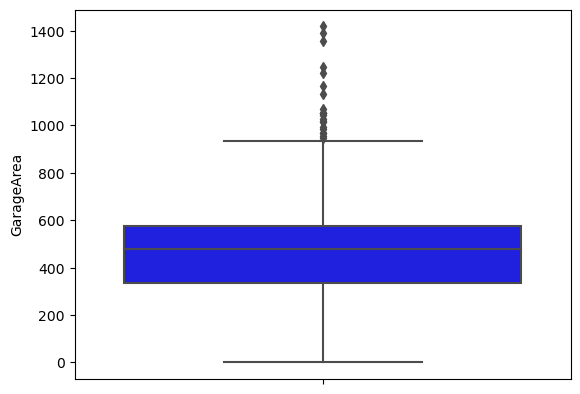

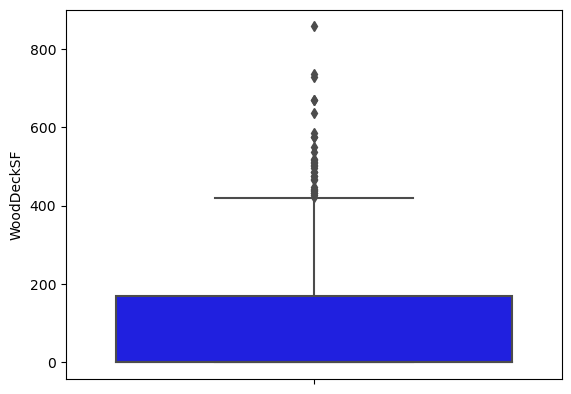

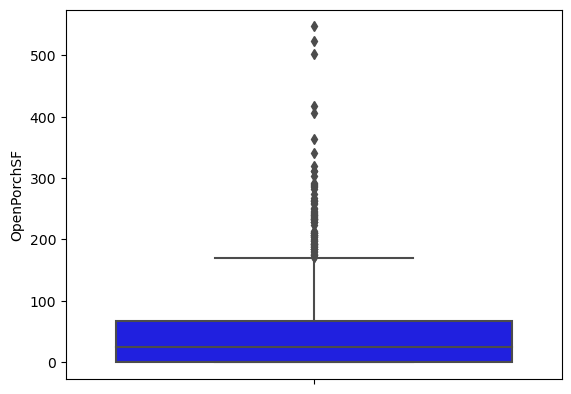

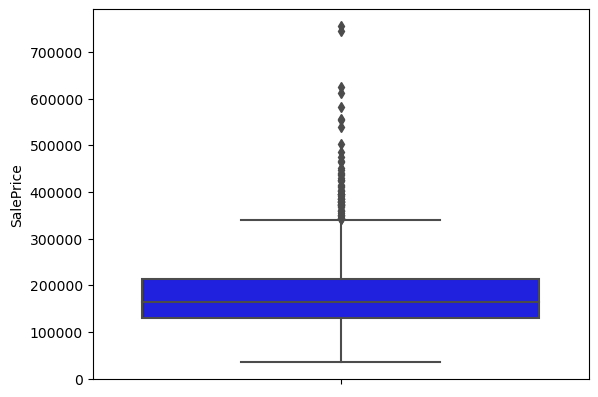

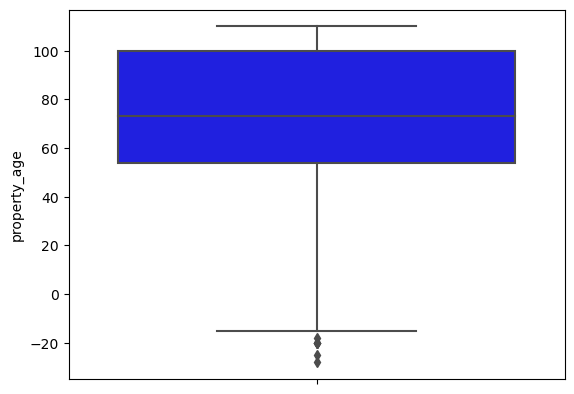

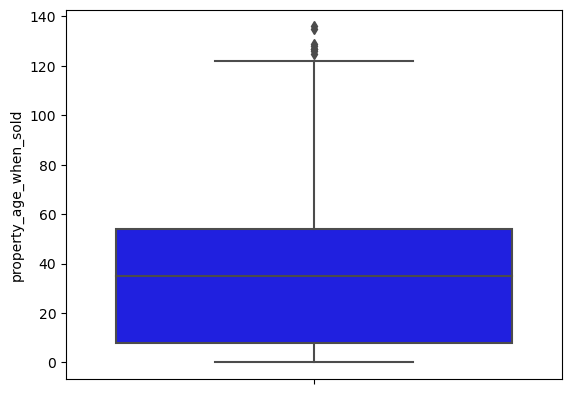

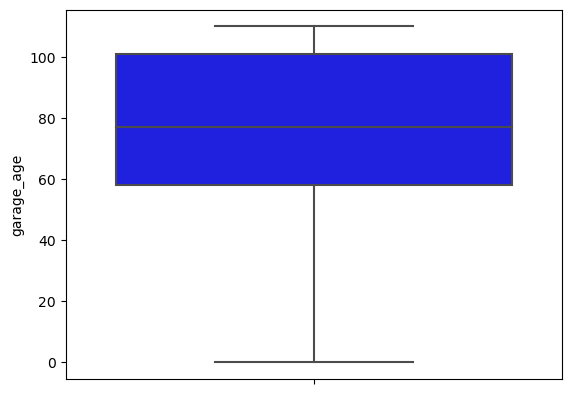

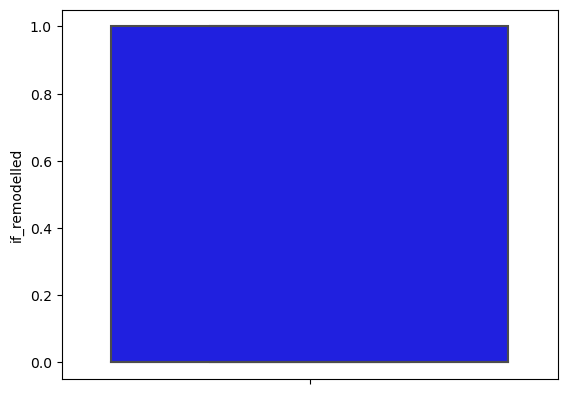

In [38]:
sns.reset_orig()
for col in numerical_features:
    sns.boxplot(y = col, color='b', data = data)
    plt.show()

In [39]:
def handleOutliers(column, df = data, percentile=0.99):
    col_df = df[column].quantile(percentile)
    return df[df[column] < col_df]

In [40]:
colsToHandleForOutliers = ['LotArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF']
total_records = len(data)
for col in colsToHandleForOutliers:
    data = handleOutliers(col)

In [41]:
# Determine the percentage of data retained

retained_data = round(100*(len(data)/total_records),2)
print("no. of records retained : ", len(data),"out of ", total_records," (", retained_data,"%",")")

no. of records retained :  1445 out of  1460  ( 98.97 % )


In [42]:
len(data)

1445

### 2.10 Remove highly correlated features

In [43]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

def identifyHighlyCorrelatedFeatures(data, fraction=0.7):
    df_corr = data.drop(['SalePrice'],axis =1)
    my_corr_matrix = df_corr.corr().abs()
    my_corr_matrix

    upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
    col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] >= fraction)]  #Reduces multicollinearity (if any)
    #col_to_drop.append('Exterior2nd_AsphShn')
    #col_to_drop.append('Exterior1st_AsphShn')
    return col_to_drop

In [44]:
col_to_drop = identifyHighlyCorrelatedFeatures(data)
col_to_drop

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'property_age_when_sold',
 'garage_age']

In [45]:
for c in ['property_age_when_sold','GarageArea']: #'1stFlrSF','TotRmsAbvGrd',
    col_to_drop.remove(c)

In [46]:
data.drop(col_to_drop, axis=1, inplace=True)

## Step 3. EDA

In [47]:
''' method to visualize the relationship between categorical variable and the target variable
    rows : number of rows in the figure
    columns : number of columns in the figure
    ind_features : list of categorical variables for which relationship is to be visualized
    dep_variable : target variables
    data : dataframe
'''
def addboxplots(rows, columns, ind_features, dep_variable, data=data):
    plt.figure(figsize=(15,15))
    for i in range(0, len(ind_features)) :
        plt.subplot(rows, columns, i+1)
        sns.boxplot(data=data, x=ind_features[i],y=dep_variable)
        plt.xticks(rotation=90)
    plt.show()

In [48]:
sns.reset_orig()
''' method to visualize the relationship between numerical variable and the target variable
    rows : number of rows in the figure
    columns : number of columns in the figure
    ind_features : list of numerical variables for which relationship is to be visualized
    dep_variable : target variables
    data : dataframe
'''
def plotnumericals(rows, columns, ind_features, dep_variable, data=data):
    plt.figure(figsize=(8,5))
    for i in range(0, len(ind_features)) :
        plt.subplot(rows, columns, i+1)
        sns.regplot(data=data, x=ind_features[i],y=dep_variable, scatter_kws={'s':1})
    plt.show()

In [49]:
def plot_cluster(columns, df = data, font_size=2):
    """
        Parameters:
            columns: columns to be considered for crrelation
            df: dataframe, defaulted to loan
            font_size : size defaulted to 2
        Returns:
            None, does a clustermap plot
    """
    dfToCorr = df[columns]
    df_corr = dfToCorr.corr()
    
    sns.set(font_scale=font_size)
    cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
    sns.clustermap(df_corr, annot=True, figsize=(30, 20),cmap="BrBG")

In [50]:
categorical_features = data.select_dtypes(include='object').columns
numerical_features = data.select_dtypes(exclude='object').columns

In [51]:
categorical_features,numerical_features

(Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
        'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
        'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'MoSold', 'SaleCondition'],
       dtype='object'),
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
        'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'property_age',
        'property_age_when_sold', 'if_remodelled'],
       dtype='object'))

In [52]:
data[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LotFrontage             1445 non-null   float64
 1   LotArea                 1445 non-null   int64  
 2   OverallQual             1445 non-null   int64  
 3   OverallCond             1445 non-null   int64  
 4   MasVnrArea              1445 non-null   float64
 5   BsmtFinSF1              1445 non-null   int64  
 6   BsmtUnfSF               1445 non-null   int64  
 7   TotalBsmtSF             1445 non-null   int64  
 8   GrLivArea               1445 non-null   int64  
 9   BsmtFullBath            1445 non-null   int64  
 10  FullBath                1445 non-null   int64  
 11  HalfBath                1445 non-null   int64  
 12  BedroomAbvGr            1445 non-null   int64  
 13  Fireplaces              1445 non-null   int64  
 14  GarageCars              1445 non-null   

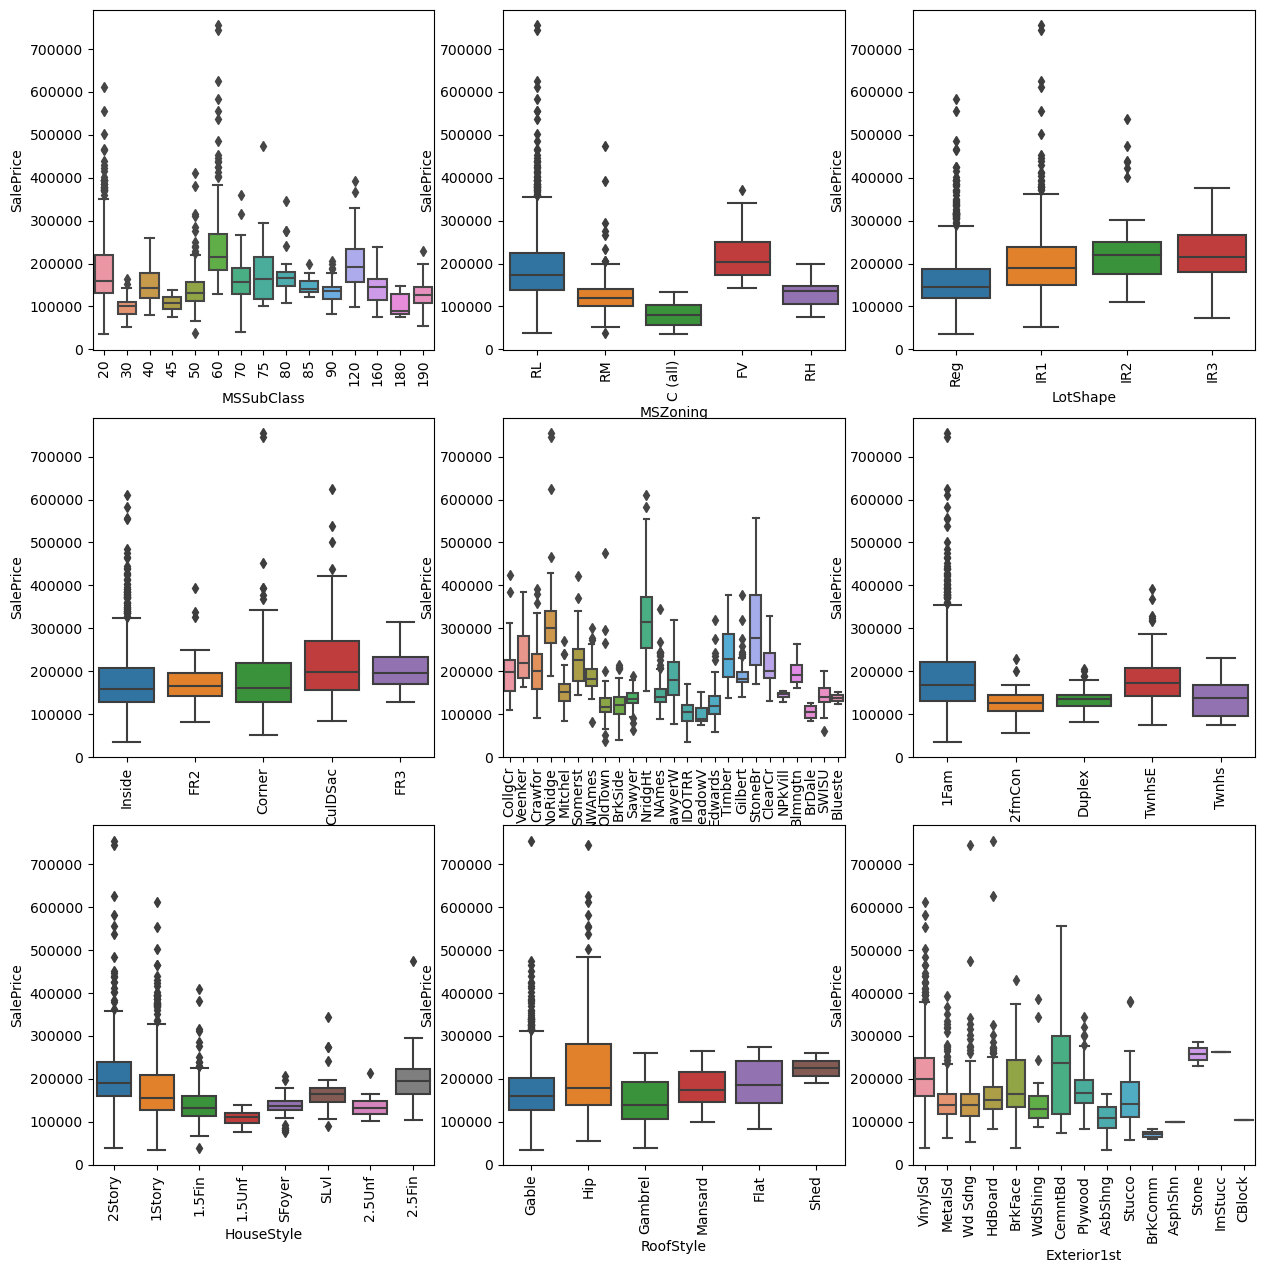

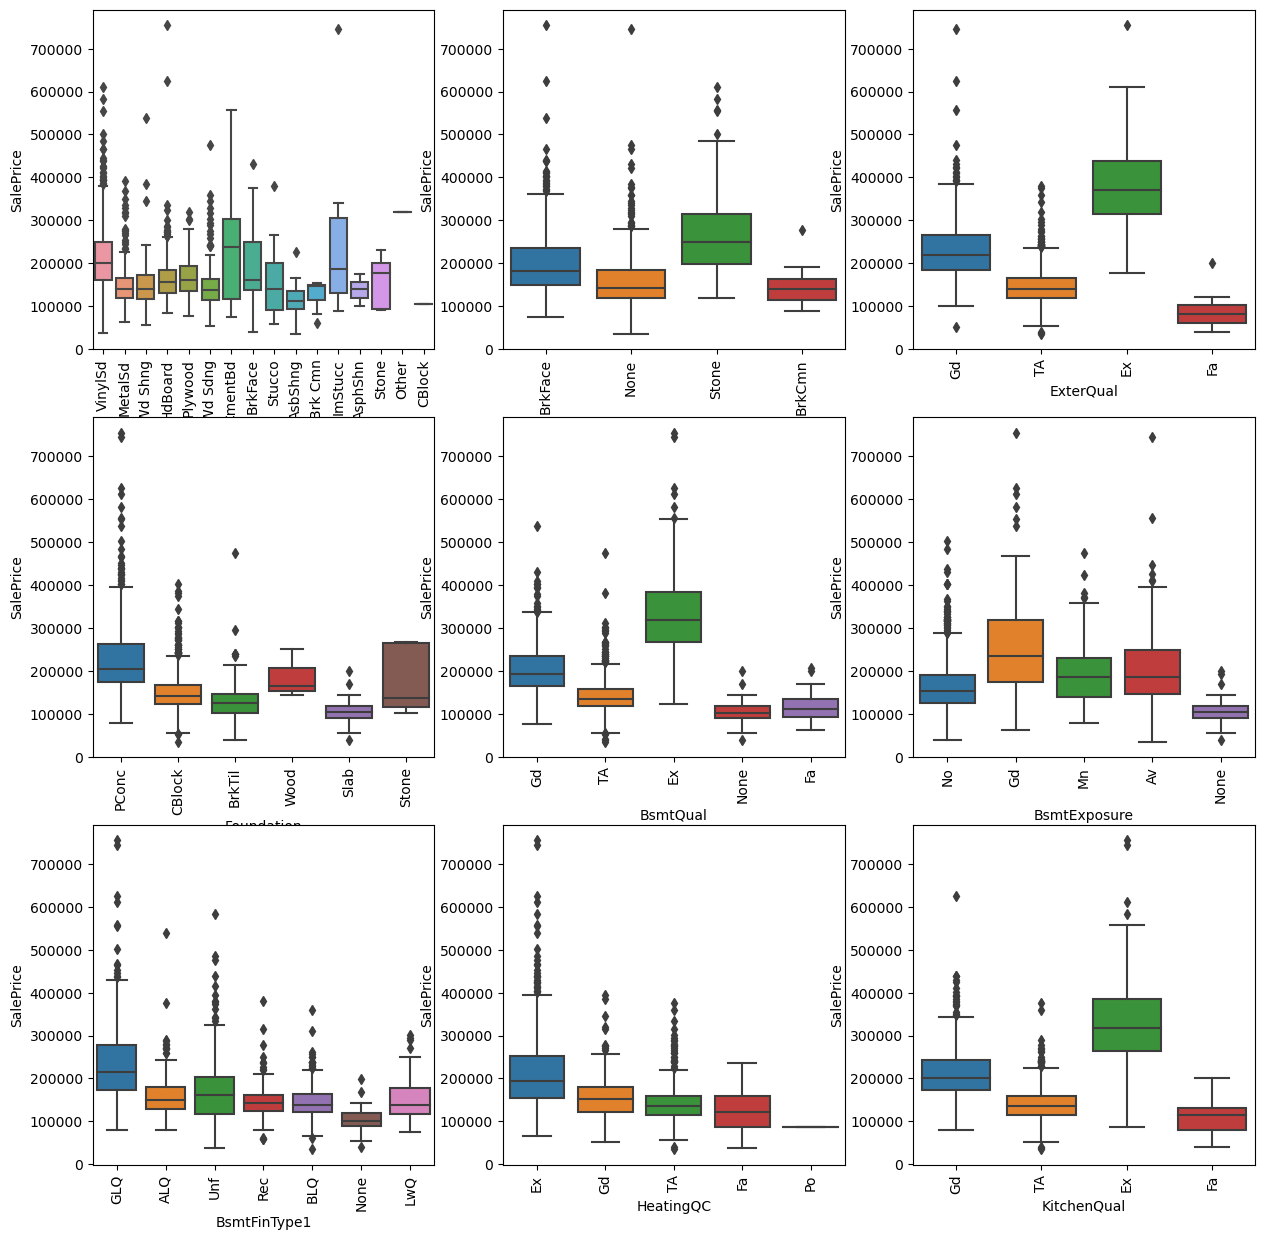

In [53]:
sns.reset_orig()
for i in range(0, int(len(categorical_features)/9)):
    addboxplots(3,3,categorical_features[i*9:i*9+9], 'SalePrice')

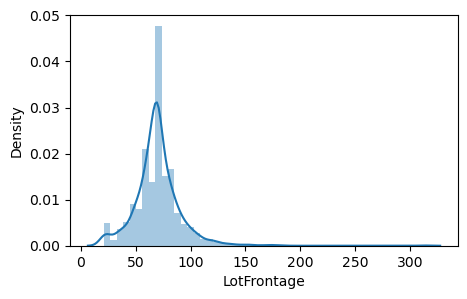

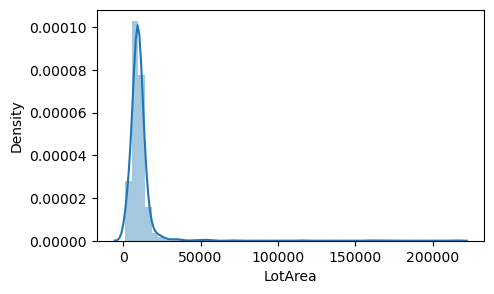

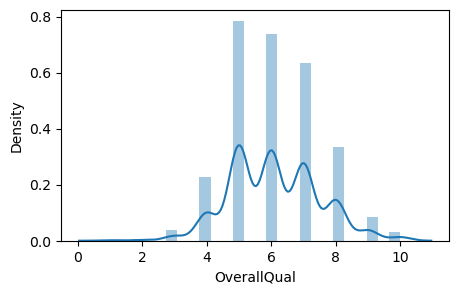

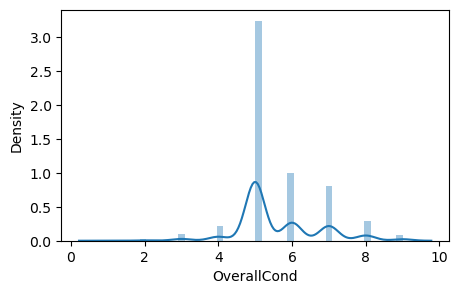

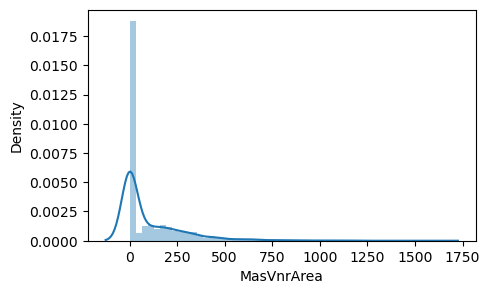

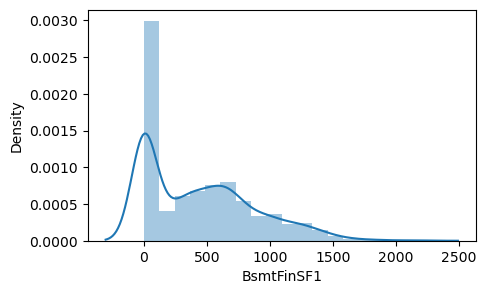

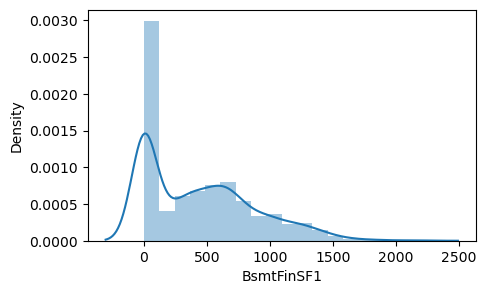

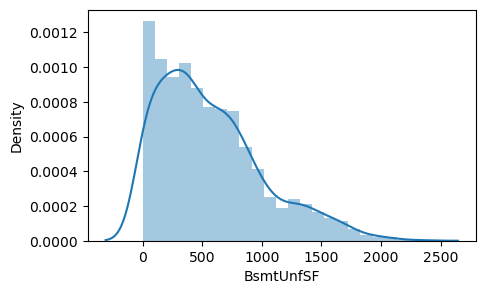

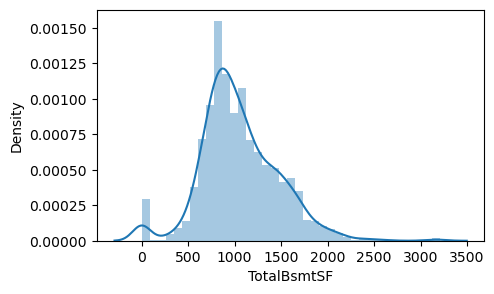

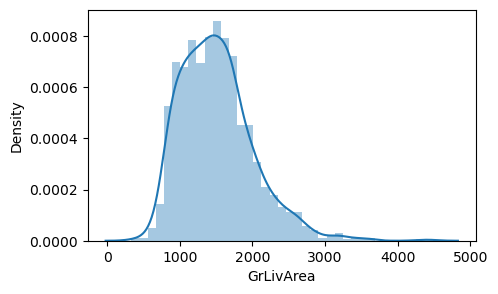

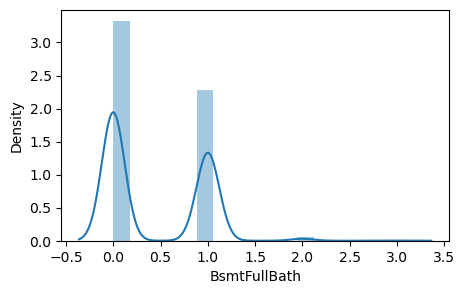

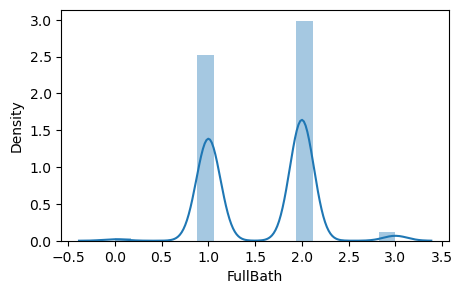

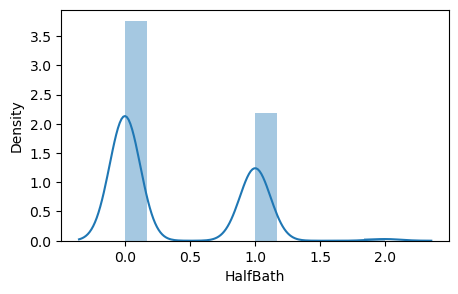

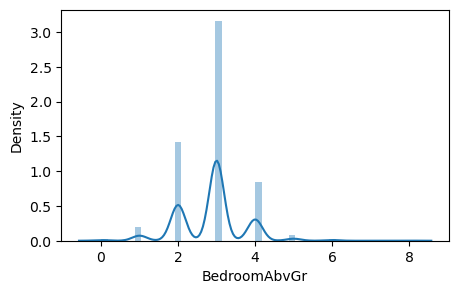

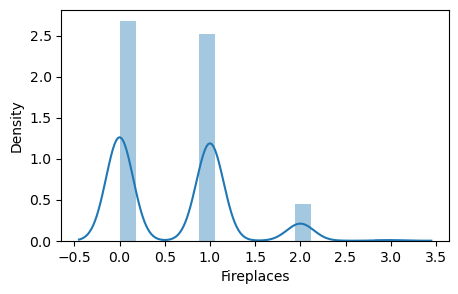

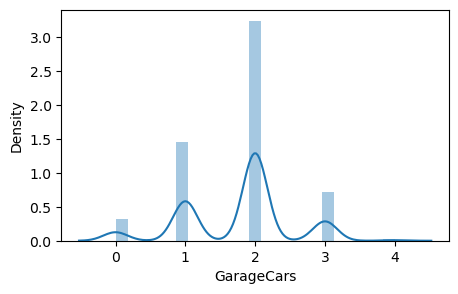

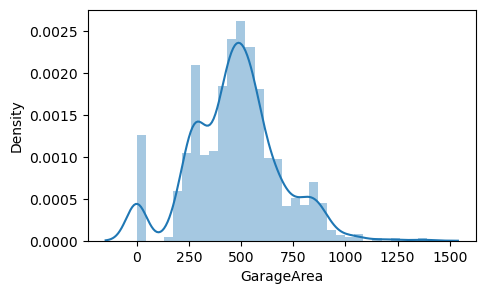

In [ ]:
for i in numerical_features:
    plt.figure(figsize = (5,3))
    sns.distplot(data[i])
plt.show()

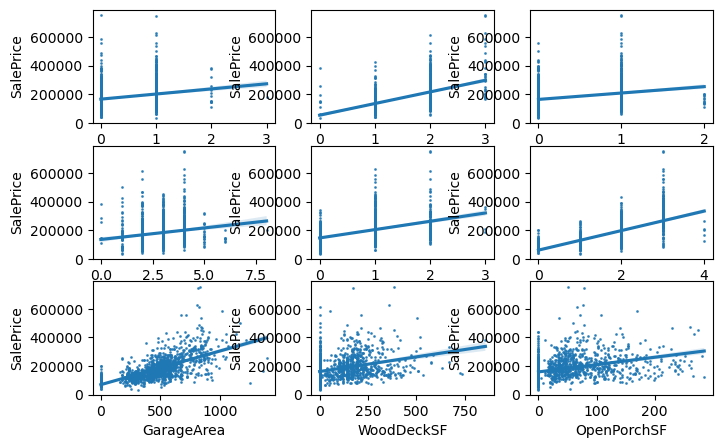

In [55]:
sns.reset_orig()
for i in range(0, int(len(categorical_features)/9)):
    plotnumericals(3,3,numerical_features[i*9:i*9+9], 'SalePrice')

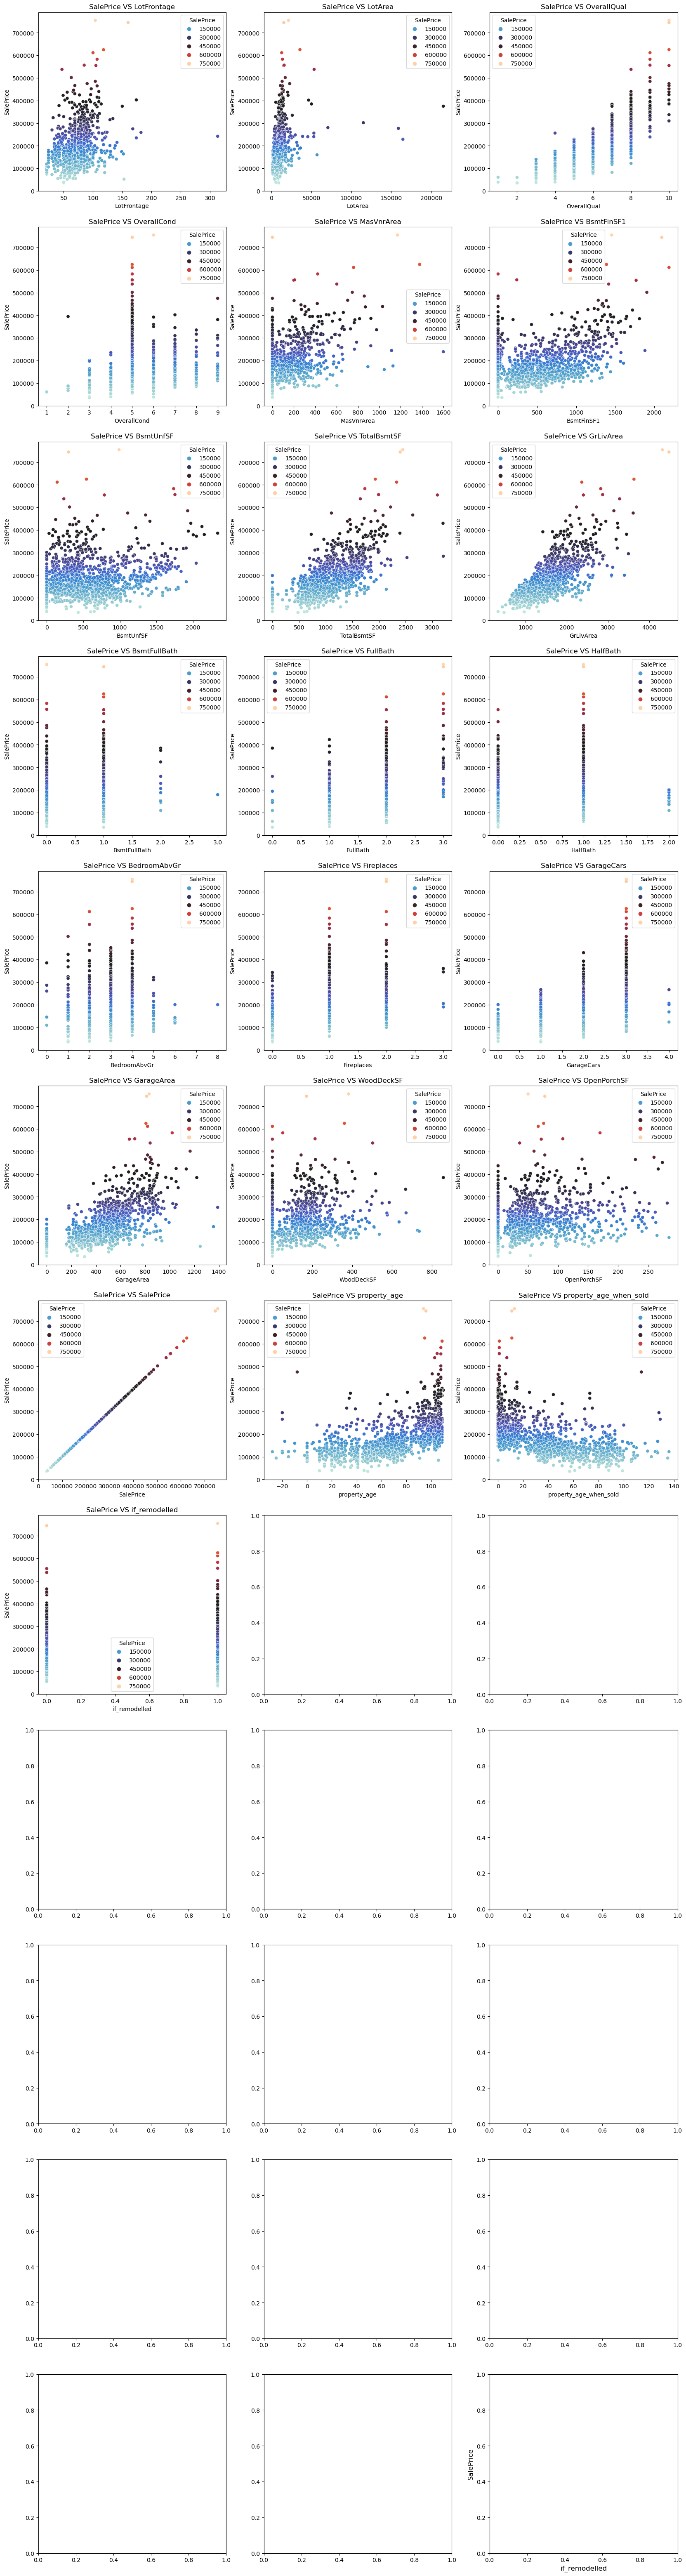

In [56]:
#Visualising numerical predictor variables with Target Variables
df_num = data[numerical_features]
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))
plt.show()

In [57]:
#sns.pairplot(data)
plt.show()

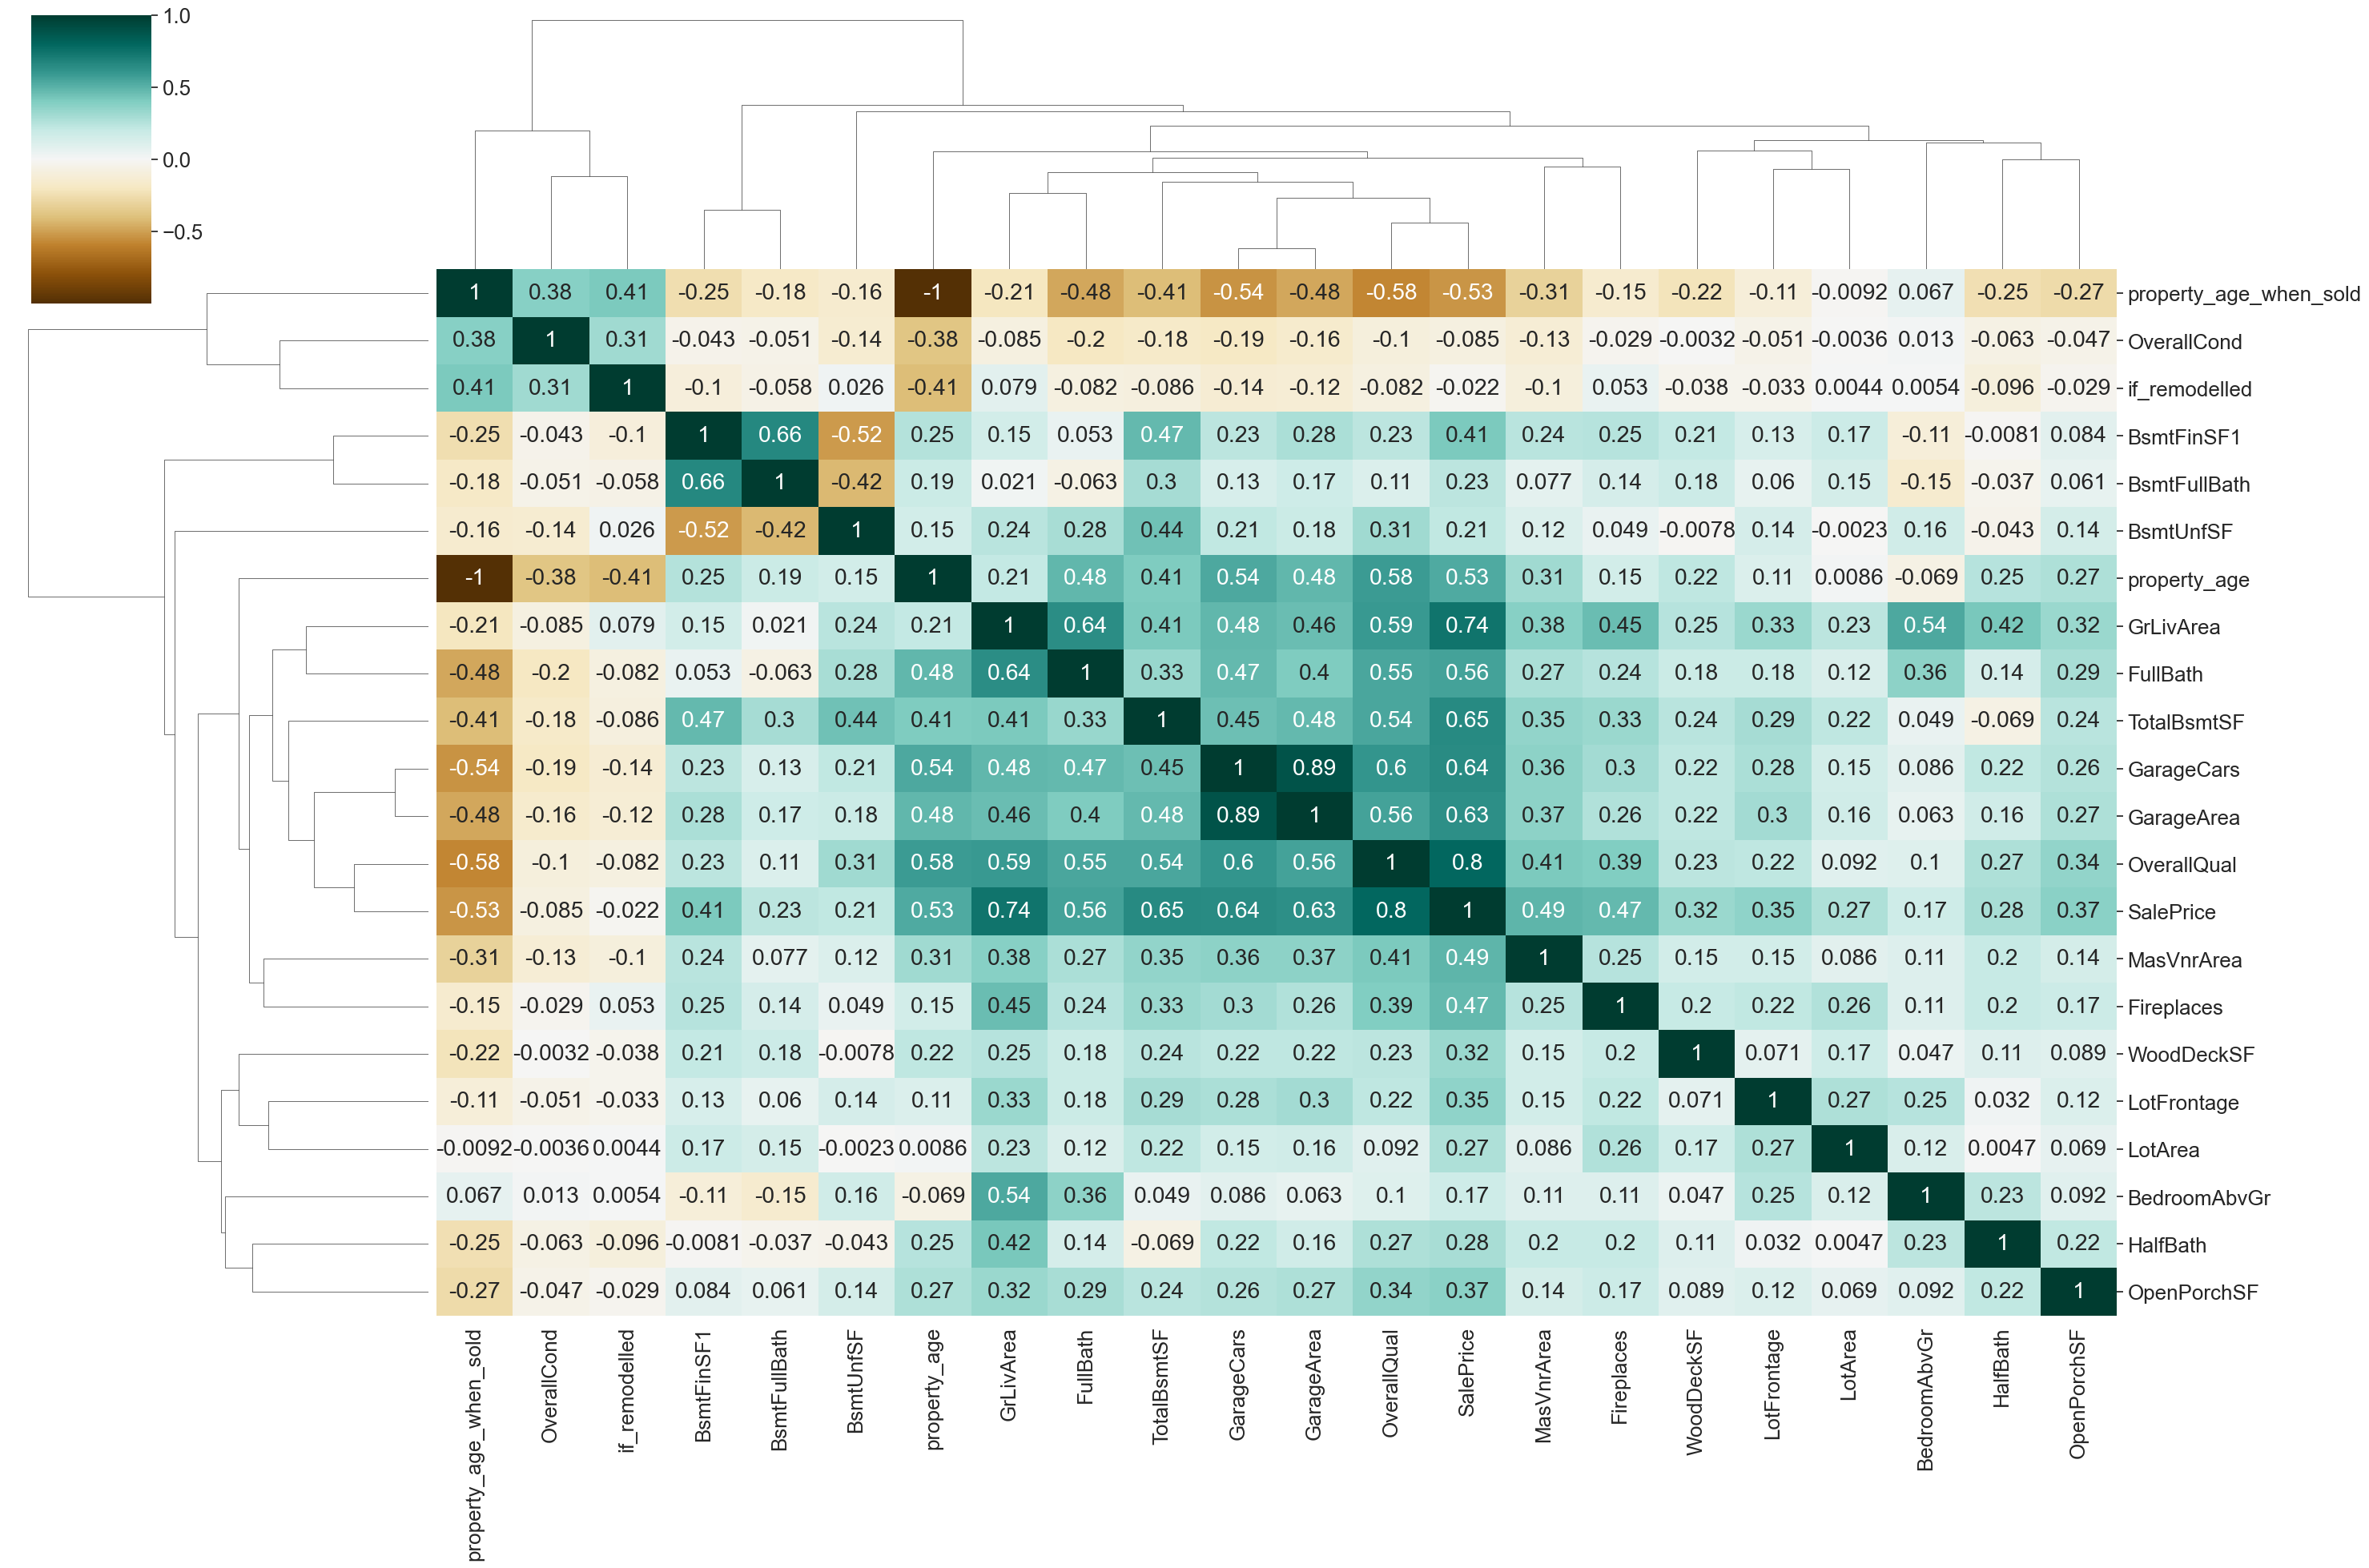

In [58]:
plot_cluster(numerical_features, data, 1.7)
plt.show()

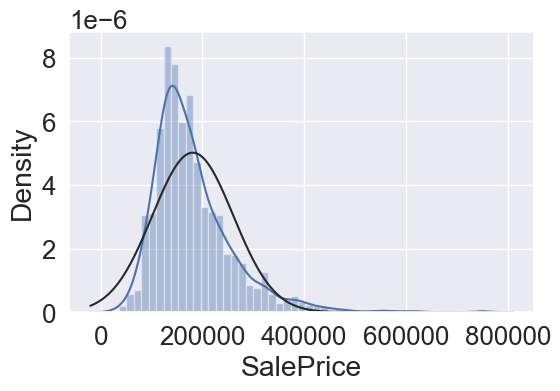

In [59]:
##Visualising the target variable 'SalePrice'
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(data['SalePrice'], fit=norm)

plt.show()

<Figure size 1440x1200 with 0 Axes>

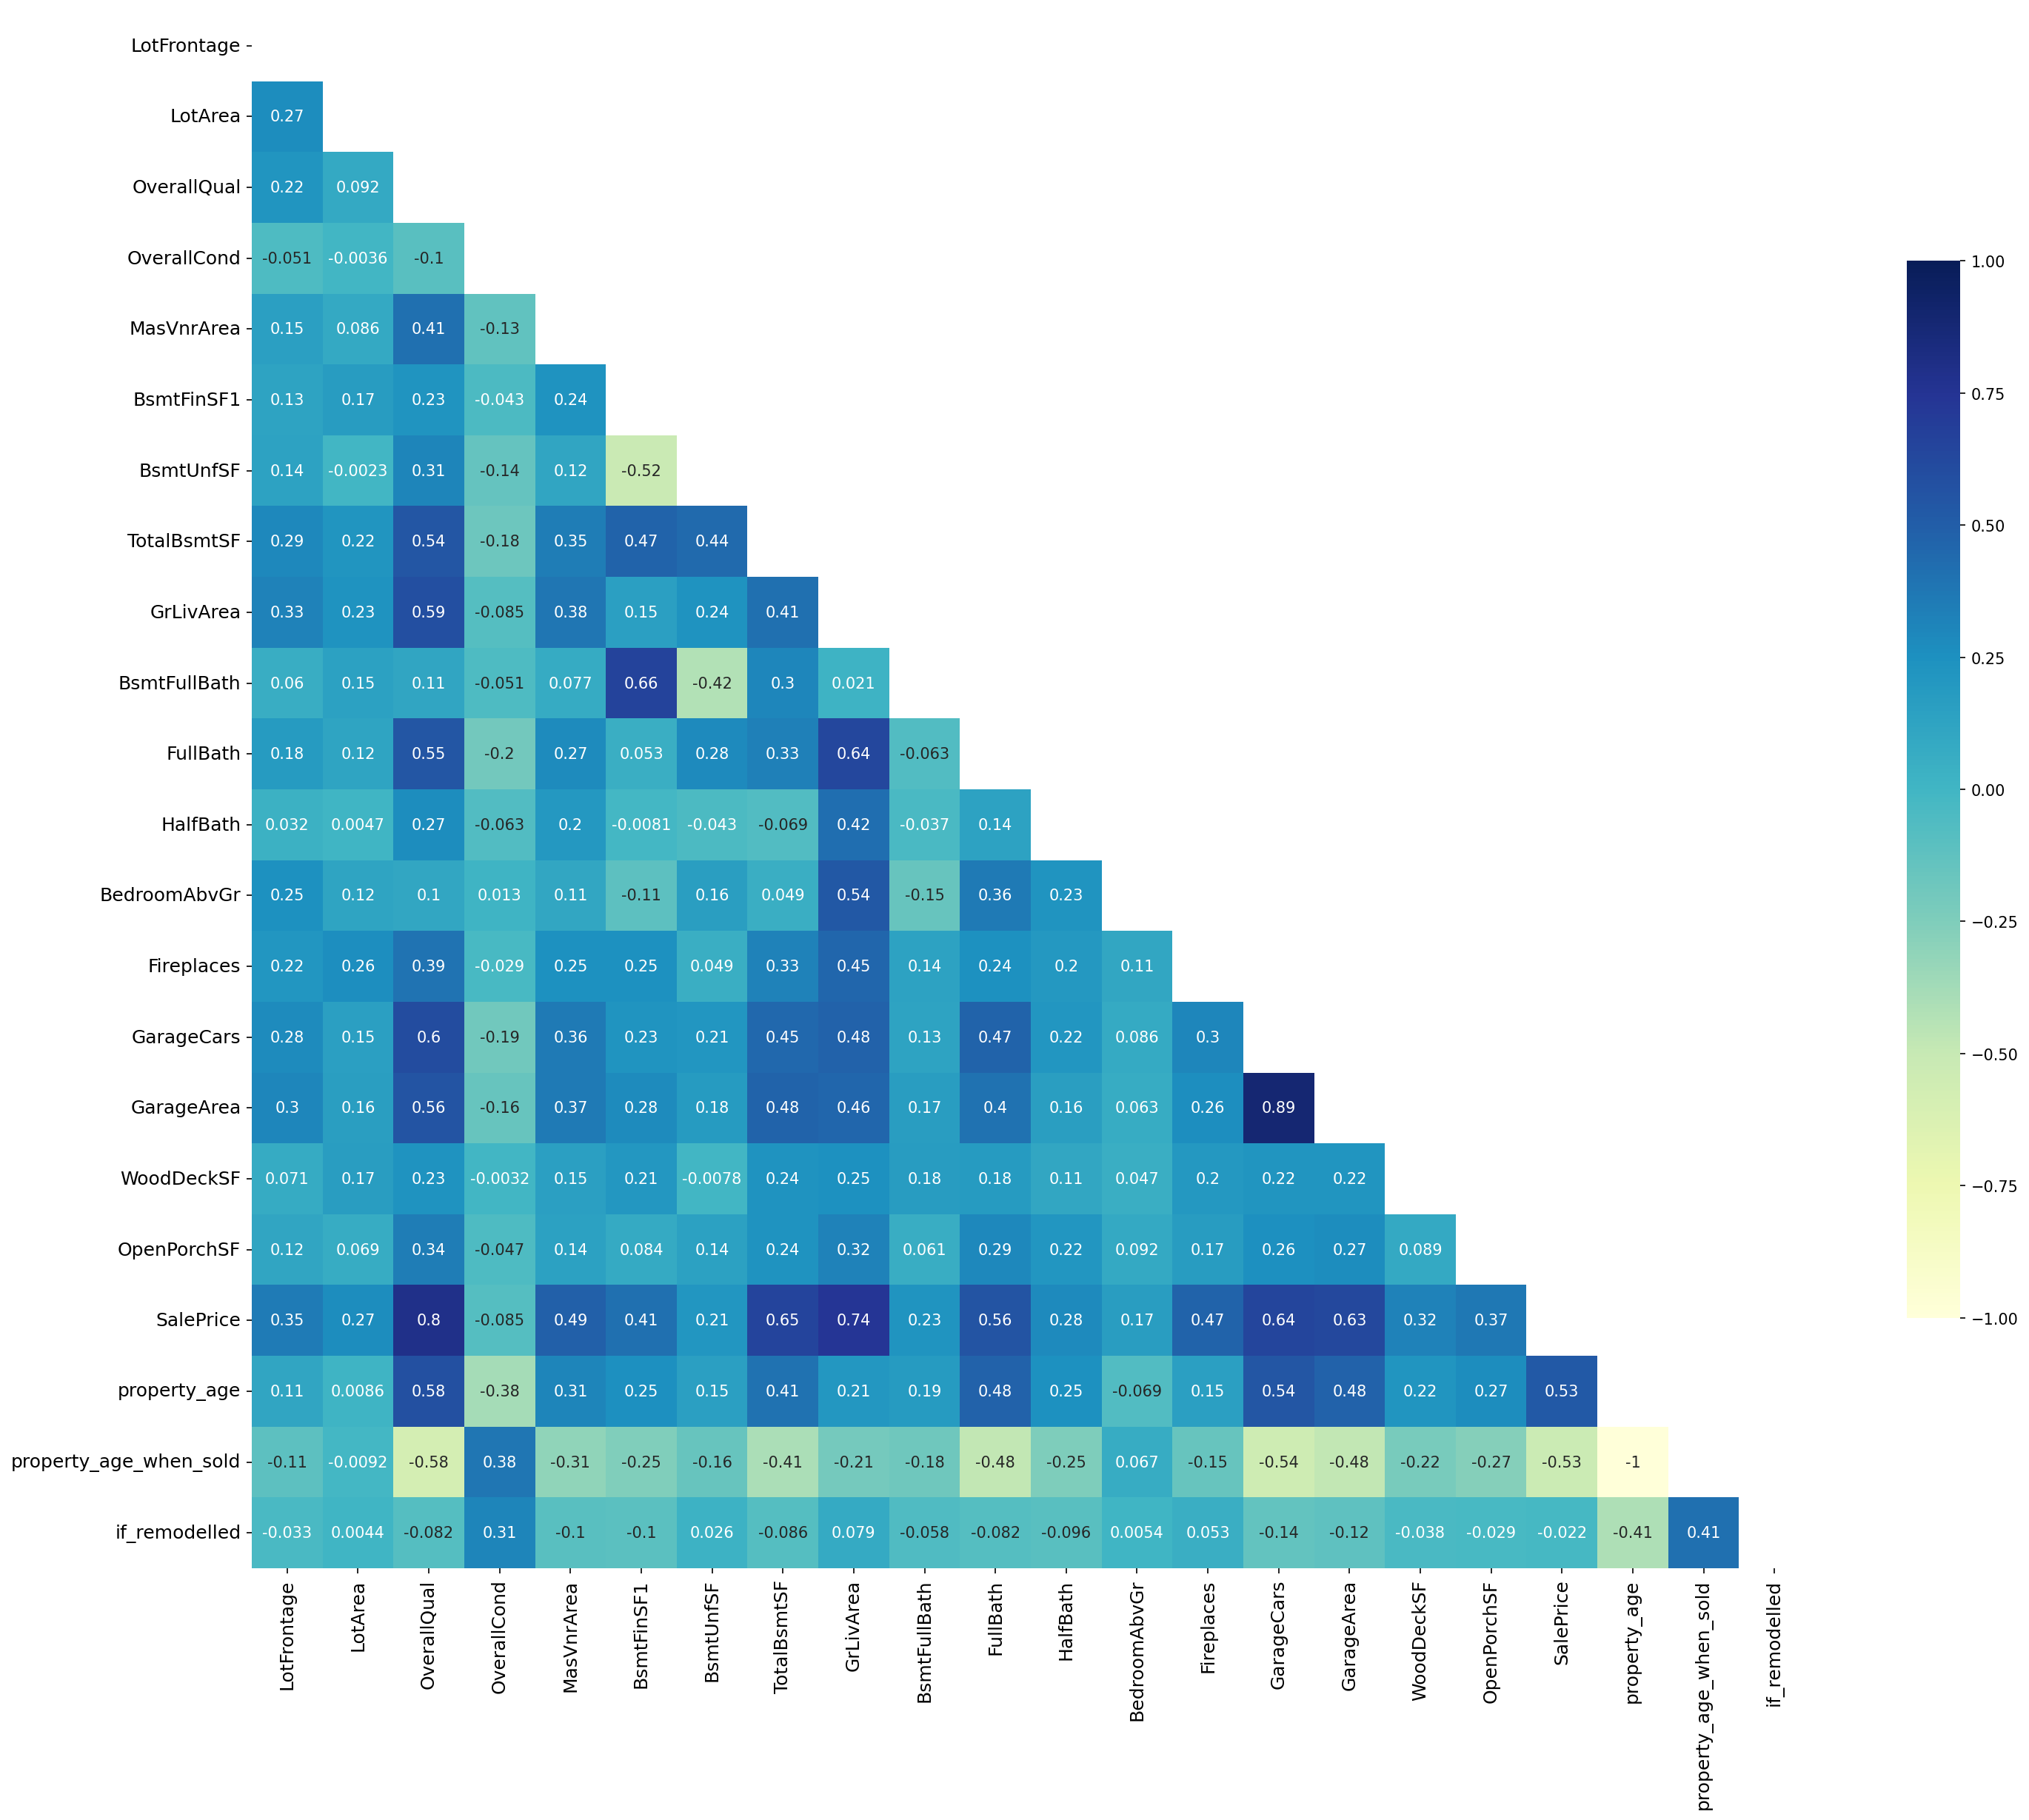

In [60]:
sns.reset_orig()
#Plotting a heatmap to understand correlation amongst numeric variables (ignore the categorical numeric ones)
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = data[numerical_features].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(20, 20), dpi=150)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

## Step 4: Data Preparation

### Step 4.1 : handling Ordinal features

In [61]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence
# For values which can be ordered, we have given an ordered sequence value

##For ordinals, let's assign them their respective weights.
data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})


data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1, inplace=True)

data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood BldgType  \
0         60       RL         65.0     8450    Inside      CollgCr     1Fam   
1         20       RL         80.0     9600       FR2      Veenker     1Fam   
2         60       RL         68.0    11250    Inside      CollgCr     1Fam   
3         70       RL         60.0     9550    Corner      Crawfor     1Fam   
4         60       RL         84.0    14260       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0    BrkFace       196.0      PConc         706        150          856   
1       None         0.0     CBlock         978        284         1262   
2    BrkFace       162.0      PConc         486        434          920   
3       None         0.0     BrkTil         216        540          756   
4    BrkFace       350.0      PConc         655        490         1145   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  \
0       1710             1         2         1             3           0   
1       1262             0         2         0             3           1   
2       1786             1         2         1             3           1   
3       1717             1         1         0             3           1   
4       2198             1         2         1             4           1   

  GarageType  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF MoSold  \
0     Attchd           2         548           0           61      2   
1     Attchd           2         460         298            0      5   
2     Attchd           2         608           0           42      9   
3     Detchd           3         642           0           35      2   
4     Attchd           3         836         192           84     12   

  SaleCondition  SalePrice  property_age  property_age_when_sold  \
0        Normal     208500           103                       5   
1        Normal     181500            76                      31   
2        Normal     223500           101                       7   
3       Abnorml     140000            15                      91   
4        Normal     250000           100                       8   

   if_remodelled  d_KitchenQual  d_FireplaceQu  d_GarageFinish  \
0              0              4              0               2   
1              0              3              3               2   
2              1              4              3               2   
3              1              4              4               1   
4              0              4              3               2   

   d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  d_LotShape  d_ExterQual  \
0               1               6            5           3            4   
1               4               5            5           3            3   
2               2               6            5           2            4   
3               1               5            4           2            3   
4               3               6            5           2            4   

   d_BsmtQual  
0           4  
1           4  
2           4  
3           3  
4           4

In [62]:
data.isnull().sum().sum()


0

### Step 4.2 : create dummies for nominal features

In [63]:
def createDummies(cols, df=data):
    for col in cols:
        df_col = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, df_col], axis = 1)
    return df

In [64]:
ordinal_cols = ['Exterior1st', 'Exterior2nd', 'Foundation','MSSubClass','GarageType', 'LotConfig' ,'HouseStyle', 'MasVnrType','MSZoning', 'Neighborhood', 'RoofStyle','BldgType', 'SaleCondition']
data = createDummies(ordinal_cols, data)
data.drop(ordinal_cols, axis=1, inplace=True)

In [65]:
import calendar
#data['MoSold'] = data['MoSold'].apply(lambda x: calendar.month_abbr[x])

In [66]:
#data = createDummies(['MoSold'], df=data)
data.drop(['MoSold'], axis =1, inplace=True)

In [67]:
data.dtypes

LotFrontage               float64
LotArea                     int64
OverallQual                 int64
OverallCond                 int64
MasVnrArea                float64
BsmtFinSF1                  int64
BsmtUnfSF                   int64
TotalBsmtSF                 int64
GrLivArea                   int64
BsmtFullBath                int64
FullBath                    int64
HalfBath                    int64
BedroomAbvGr                int64
Fireplaces                  int64
GarageCars                  int64
GarageArea                  int64
WoodDeckSF                  int64
OpenPorchSF                 int64
SalePrice                   int64
property_age                int64
property_age_when_sold      int64
if_remodelled               int64
d_KitchenQual               int64
d_FireplaceQu               int64
d_GarageFinish              int64
d_BsmtExposure              int64
d_BsmtFinType1              int64
d_HeatingQC                 int64
d_LotShape                  int64
d_ExterQual   

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 141 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(29), uint8(110)
memory usage: 516.5 KB


In [69]:
data.select_dtypes(include=['string','object']).columns

Index([], dtype='object')

In [70]:
# handle highly correlated features
col_to_drop = identifyHighlyCorrelatedFeatures(data, 0.85)
col_to_drop

['GarageArea',
 'property_age_when_sold',
 'd_FireplaceQu',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'HouseStyle_1.5Unf',
 'HouseStyle_SLvl',
 'Neighborhood_Somerst',
 'RoofStyle_Hip',
 'BldgType_2fmCon',
 'BldgType_Duplex']

In [71]:
col_to_drop.remove('GarageArea')
col_to_drop.remove('property_age_when_sold')
col_to_drop.append('Exterior2nd_AsphShn')
col_to_drop.append('Exterior1st_AsphShn')

data.drop(col_to_drop, axis=1, inplace=True)

## Step 5: Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size = 0.3, random_state=100)

### Feature scaling

In [73]:
##Creating a function to find binary value columns from the 'data' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(data)
print("binary valued columns ",binary_cols)

binary valued columns  ['if_remodelled', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None', 'LotConfig_CulDSa

In [74]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import MinMaxScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [75]:
print(df_train.shape)
print(df_test.shape)

(1011, 126)
(434, 126)


In [76]:
##Storing target variable 'SalePrice' to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

##Removing target variable from X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

## Step 6 : Recursive Feature Elimination (RFE)
There are 158 features in the dataset, we will use RFE to reduce the number of features to 50 and use these features to further models and analysis

In [77]:
#plot_cluster(data.columns, data, 1.7)
#plt.show()

In [78]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [79]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
features_rfe_ranks = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
features_rfe_ranks

[('LotFrontage', False, 63),
 ('LotArea', False, 17),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 24),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 75),
 ('TotalBsmtSF', False, 5),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 76),
 ('FullBath', False, 35),
 ('HalfBath', False, 51),
 ('BedroomAbvGr', False, 13),
 ('Fireplaces', False, 64),
 ('GarageCars', True, 1),
 ('GarageArea', False, 66),
 ('WoodDeckSF', False, 45),
 ('OpenPorchSF', False, 37),
 ('property_age', True, 1),
 ('property_age_when_sold', False, 74),
 ('d_KitchenQual', False, 9),
 ('d_GarageFinish', False, 67),
 ('d_BsmtExposure', True, 1),
 ('d_BsmtFinType1', False, 68),
 ('d_HeatingQC', False, 69),
 ('d_LotShape', False, 73),
 ('d_ExterQual', False, 26),
 ('d_BsmtQual', False, 34),
 ('if_remodelled', False, 39),
 ('Exterior1st_BrkComm', True, 1),
 ('Exterior1st_BrkFace', True, 1),
 ('Exterior1st_CBlock', False, 71),
 ('Exterior1st_CemntBd', True, 1),
 ('Exterior1st_HdBoard', Fals

In [80]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'GrLivArea', 'GarageCars',
       'property_age', 'd_BsmtExposure', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Foundation_Wood', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Bldg

In [81]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top70_df = pd.DataFrame(features_rfe_ranks, columns=['Features', 'rfe_support', 'rfe_ranking'])
top70_df = top70_df.loc[top70_df['rfe_support'] == True]
top70_df.reset_index(drop=True, inplace=True)
top70_df

Features  rfe_support  rfe_ranking
0             OverallQual         True            1
1             OverallCond         True            1
2              BsmtFinSF1         True            1
3               GrLivArea         True            1
4              GarageCars         True            1
5            property_age         True            1
6          d_BsmtExposure         True            1
7     Exterior1st_BrkComm         True            1
8     Exterior1st_BrkFace         True            1
9     Exterior1st_CemntBd         True            1
10    Exterior1st_ImStucc         True            1
11      Exterior1st_Stone         True            1
12        Foundation_Wood         True            1
13          MSSubClass_75         True            1
14          MSSubClass_90         True            1
15         MSSubClass_120         True            1
16         MSSubClass_160         True            1
17         MSSubClass_180         True            1
18      GarageType_Attchd         True            1
19     GarageType_Basment         True            1
20     GarageType_BuiltIn         True            1
21     GarageType_CarPort         True            1
22      GarageType_Detchd         True            1
23        GarageType_None         True            1
24      HouseStyle_1Story         True            1
25      HouseStyle_2.5Fin         True            1
26      HouseStyle_2.5Unf         True            1
27     MasVnrType_BrkFace         True            1
28        MasVnrType_None         True            1
29       MasVnrType_Stone         True            1
30            MSZoning_FV         True            1
31            MSZoning_RH         True            1
32            MSZoning_RL         True            1
33            MSZoning_RM         True            1
34   Neighborhood_Blueste         True            1
35    Neighborhood_BrDale         True            1
36   Neighborhood_BrkSide         True            1
37   Neighborhood_Crawfor         True            1
38    Neighborhood_IDOTRR         True            1
39   Neighborhood_NPkVill         True            1
40    Neighborhood_NWAmes         True            1
41   Neighborhood_NoRidge         True            1
42   Neighborhood_NridgHt         True            1
43   Neighborhood_StoneBr         True            1
44   Neighborhood_Veenker         True            1
45         BldgType_Twnhs         True            1
46  SaleCondition_AdjLand         True            1
47   SaleCondition_Family         True            1
48   SaleCondition_Normal         True            1
49  SaleCondition_Partial         True            1

In [82]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [83]:
##Making sure that we have only 70 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model building

## Step 7: Linear Regression model 

### Step 7.1: Training the model 

In [84]:
X_train1,y_train1  =X_train,y_train

In [85]:
def buildAndTrainModel(ind_vars, data = X_train1, target = y_train1):
    # filter the subset of columns from original df_train set
    data_sm = data[ind_vars]
    # add constant
    data_sm = sm.add_constant(data_sm)
    # create the model
    lr = sm.OLS(target, data_sm)
    # fit the model
    lr_model = lr.fit()
    # print params
    print((lr_model.params, lr_model.summary()))
    return lr_model

In [86]:
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending= False)
    print(vif)

In [87]:
def train(ind_vars, data = X_train1, target = y_train1):
    buildAndTrainModel(ind_vars, data, target)
    calculateVIF(data)

In [88]:
train(list(X_train1.columns), X_train1, y_train1)

(const                   -1.004581
OverallQual              0.202709
OverallCond              0.092327
BsmtFinSF1               0.128569
GrLivArea                0.476680
GarageCars               0.096837
property_age             0.177414
d_BsmtExposure           0.126363
Exterior1st_BrkComm     -0.461143
Exterior1st_BrkFace      0.287519
Exterior1st_CemntBd      0.203885
Exterior1st_ImStucc     -0.346058
Exterior1st_Stone       -0.198129
Foundation_Wood         -0.407729
MSSubClass_75            0.201843
MSSubClass_90           -0.385726
MSSubClass_120          -0.305901
MSSubClass_160          -0.480519
MSSubClass_180          -0.189066
GarageType_Attchd        0.226724
GarageType_Basment       0.096111
GarageType_BuiltIn       0.272312
GarageType_CarPort       0.195992
GarageType_Detchd        0.272902
GarageType_None          0.413679
HouseStyle_1Story        0.200595
HouseStyle_2.5Fin       -0.236034
HouseStyle_2.5Unf       -0.429655
MasVnrType_BrkFace       0.265928
MasVnrType_No

In [89]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageType_Basment'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)


(const                   -0.924570
OverallQual              0.203667
OverallCond              0.092383
BsmtFinSF1               0.128391
GrLivArea                0.476830
GarageCars               0.094973
property_age             0.178203
d_BsmtExposure           0.126616
Exterior1st_BrkComm     -0.462783
Exterior1st_BrkFace      0.288593
Exterior1st_CemntBd      0.203032
Exterior1st_ImStucc     -0.343930
Exterior1st_Stone       -0.199284
Foundation_Wood         -0.400341
MSSubClass_75            0.204388
MSSubClass_90           -0.386630
MSSubClass_120          -0.306111
MSSubClass_160          -0.480450
MSSubClass_180          -0.181623
GarageType_Attchd        0.152619
GarageType_BuiltIn       0.197962
GarageType_CarPort       0.123547
GarageType_Detchd        0.200017
GarageType_None          0.337189
HouseStyle_1Story        0.200690
HouseStyle_2.5Fin       -0.231962
HouseStyle_2.5Unf       -0.432236
MasVnrType_BrkFace       0.266649
MasVnrType_None          0.234991
MasVnrType_St

In [90]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageType_CarPort'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.876074
OverallQual              0.203345
OverallCond              0.092619
BsmtFinSF1               0.128410
GrLivArea                0.476978
GarageCars               0.095080
property_age             0.177903
d_BsmtExposure           0.126280
Exterior1st_BrkComm     -0.461904
Exterior1st_BrkFace      0.286688
Exterior1st_CemntBd      0.204979
Exterior1st_ImStucc     -0.345339
Exterior1st_Stone       -0.196989
Foundation_Wood         -0.411007
MSSubClass_75            0.203172
MSSubClass_90           -0.377714
MSSubClass_120          -0.305027
MSSubClass_160          -0.479800
MSSubClass_180          -0.190615
GarageType_Attchd        0.122450
GarageType_BuiltIn       0.168006
GarageType_Detchd        0.168374
GarageType_None          0.304855
HouseStyle_1Story        0.200716
HouseStyle_2.5Fin       -0.237586
HouseStyle_2.5Unf       -0.431882
MasVnrType_BrkFace       0.252173
MasVnrType_None          0.221927
MasVnrType_Stone         0.292430
MSZoning_FV  

In [91]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_Stone'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.873831
OverallQual              0.203458
OverallCond              0.092269
BsmtFinSF1               0.128336
GrLivArea                0.475304
GarageCars               0.095198
property_age             0.177662
d_BsmtExposure           0.126188
Exterior1st_BrkComm     -0.455664
Exterior1st_BrkFace      0.289465
Exterior1st_CemntBd      0.206515
Exterior1st_ImStucc     -0.345581
Foundation_Wood         -0.410722
MSSubClass_75            0.205731
MSSubClass_90           -0.376815
MSSubClass_120          -0.304732
MSSubClass_160          -0.481468
MSSubClass_180          -0.194916
GarageType_Attchd        0.119487
GarageType_BuiltIn       0.165705
GarageType_Detchd        0.166281
GarageType_None          0.302569
HouseStyle_1Story        0.198339
HouseStyle_2.5Fin       -0.235578
HouseStyle_2.5Unf       -0.433387
MasVnrType_BrkFace       0.251301
MasVnrType_None          0.219635
MasVnrType_Stone         0.291773
MSZoning_FV              0.525948
MSZoning_RH  

In [92]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['SaleCondition_Family'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.870963
OverallQual              0.203517
OverallCond              0.091460
BsmtFinSF1               0.127863
GrLivArea                0.475272
GarageCars               0.094286
property_age             0.177686
d_BsmtExposure           0.126905
Exterior1st_BrkComm     -0.473678
Exterior1st_BrkFace      0.288721
Exterior1st_CemntBd      0.205707
Exterior1st_ImStucc     -0.342182
Foundation_Wood         -0.407496
MSSubClass_75            0.200795
MSSubClass_90           -0.378833
MSSubClass_120          -0.305419
MSSubClass_160          -0.483986
MSSubClass_180          -0.197940
GarageType_Attchd        0.124855
GarageType_BuiltIn       0.172148
GarageType_Detchd        0.172100
GarageType_None          0.304073
HouseStyle_1Story        0.198542
HouseStyle_2.5Fin       -0.230689
HouseStyle_2.5Unf       -0.431602
MasVnrType_BrkFace       0.254915
MasVnrType_None          0.223009
MasVnrType_Stone         0.295964
MSZoning_FV              0.529758
MSZoning_RH  

In [93]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSZoning_RM'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.710943
OverallQual              0.205246
OverallCond              0.091864
BsmtFinSF1               0.127517
GrLivArea                0.474612
GarageCars               0.092432
property_age             0.178382
d_BsmtExposure           0.126856
Exterior1st_BrkComm     -0.468627
Exterior1st_BrkFace      0.290192
Exterior1st_CemntBd      0.205075
Exterior1st_ImStucc     -0.341550
Foundation_Wood         -0.404653
MSSubClass_75            0.245033
MSSubClass_90           -0.375106
MSSubClass_120          -0.306253
MSSubClass_160          -0.484359
MSSubClass_180          -0.195525
GarageType_Attchd        0.133259
GarageType_BuiltIn       0.180533
GarageType_Detchd        0.181201
GarageType_None          0.312592
HouseStyle_1Story        0.198249
HouseStyle_2.5Fin       -0.262218
HouseStyle_2.5Unf       -0.482069
MasVnrType_BrkFace       0.252261
MasVnrType_None          0.219959
MasVnrType_Stone         0.293614
MSZoning_FV              0.358817
MSZoning_RH  

In [94]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSZoning_RH'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.702512
OverallQual              0.205194
OverallCond              0.091570
BsmtFinSF1               0.127680
GrLivArea                0.474538
GarageCars               0.091972
property_age             0.179120
d_BsmtExposure           0.126666
Exterior1st_BrkComm     -0.469172
Exterior1st_BrkFace      0.289949
Exterior1st_CemntBd      0.204135
Exterior1st_ImStucc     -0.341416
Foundation_Wood         -0.405426
MSSubClass_75            0.246839
MSSubClass_90           -0.371474
MSSubClass_120          -0.306300
MSSubClass_160          -0.486306
MSSubClass_180          -0.201524
GarageType_Attchd        0.131820
GarageType_BuiltIn       0.178882
GarageType_Detchd        0.179950
GarageType_None          0.310843
HouseStyle_1Story        0.197726
HouseStyle_2.5Fin       -0.264596
HouseStyle_2.5Unf       -0.486374
MasVnrType_BrkFace       0.251758
MasVnrType_None          0.219412
MasVnrType_Stone         0.292591
MSZoning_FV              0.353066
MSZoning_RL  

In [95]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSZoning_RL'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.647361
OverallQual              0.202701
OverallCond              0.091331
BsmtFinSF1               0.128195
GrLivArea                0.475211
GarageCars               0.089292
property_age             0.188237
d_BsmtExposure           0.126854
Exterior1st_BrkComm     -0.465628
Exterior1st_BrkFace      0.295820
Exterior1st_CemntBd      0.196964
Exterior1st_ImStucc     -0.341430
Foundation_Wood         -0.404066
MSSubClass_75            0.263505
MSSubClass_90           -0.379891
MSSubClass_120          -0.327466
MSSubClass_160          -0.500167
MSSubClass_180          -0.247114
GarageType_Attchd        0.130539
GarageType_BuiltIn       0.177685
GarageType_Detchd        0.174751
GarageType_None          0.305390
HouseStyle_1Story        0.200902
HouseStyle_2.5Fin       -0.269347
HouseStyle_2.5Unf       -0.506758
MasVnrType_BrkFace       0.242337
MasVnrType_None          0.209972
MasVnrType_Stone         0.280707
MSZoning_FV              0.311471
Neighborhood_

In [96]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['BldgType_Twnhs'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.644866
OverallQual              0.203184
OverallCond              0.090814
BsmtFinSF1               0.128197
GrLivArea                0.475337
GarageCars               0.090565
property_age             0.187602
d_BsmtExposure           0.127366
Exterior1st_BrkComm     -0.466542
Exterior1st_BrkFace      0.295440
Exterior1st_CemntBd      0.191270
Exterior1st_ImStucc     -0.343337
Foundation_Wood         -0.406112
MSSubClass_75            0.262496
MSSubClass_90           -0.380245
MSSubClass_120          -0.336599
MSSubClass_160          -0.552806
MSSubClass_180          -0.290314
GarageType_Attchd        0.128204
GarageType_BuiltIn       0.171703
GarageType_Detchd        0.171730
GarageType_None          0.303246
HouseStyle_1Story        0.201227
HouseStyle_2.5Fin       -0.270542
HouseStyle_2.5Unf       -0.507038
MasVnrType_BrkFace       0.242433
MasVnrType_None          0.211038
MasVnrType_Stone         0.274572
MSZoning_FV              0.314416
Neighborhood_

In [97]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_IDOTRR'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.635651
OverallQual              0.204254
OverallCond              0.090514
BsmtFinSF1               0.127445
GrLivArea                0.473078
GarageCars               0.090468
property_age             0.184318
d_BsmtExposure           0.128178
Exterior1st_BrkComm     -0.468993
Exterior1st_BrkFace      0.297263
Exterior1st_CemntBd      0.192931
Exterior1st_ImStucc     -0.343977
Foundation_Wood         -0.408279
MSSubClass_75            0.266961
MSSubClass_90           -0.380647
MSSubClass_120          -0.336352
MSSubClass_160          -0.555507
MSSubClass_180          -0.300678
GarageType_Attchd        0.118857
GarageType_BuiltIn       0.163045
GarageType_Detchd        0.164350
GarageType_None          0.297717
HouseStyle_1Story        0.198679
HouseStyle_2.5Fin       -0.280282
HouseStyle_2.5Unf       -0.507625
MasVnrType_BrkFace       0.244035
MasVnrType_None          0.213412
MasVnrType_Stone         0.277113
MSZoning_FV              0.314955
Neighborhood_

In [98]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_ImStucc'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.635673
OverallQual              0.203329
OverallCond              0.090767
BsmtFinSF1               0.126640
GrLivArea                0.474346
GarageCars               0.089507
property_age             0.185035
d_BsmtExposure           0.128758
Exterior1st_BrkComm     -0.469028
Exterior1st_BrkFace      0.298822
Exterior1st_CemntBd      0.193648
Foundation_Wood         -0.407685
MSSubClass_75            0.266789
MSSubClass_90           -0.381553
MSSubClass_120          -0.335920
MSSubClass_160          -0.557079
MSSubClass_180          -0.302296
GarageType_Attchd        0.118771
GarageType_BuiltIn       0.162195
GarageType_Detchd        0.165153
GarageType_None          0.296624
HouseStyle_1Story        0.198126
HouseStyle_2.5Fin       -0.281884
HouseStyle_2.5Unf       -0.507714
MasVnrType_BrkFace       0.245999
MasVnrType_None          0.213359
MasVnrType_Stone         0.278807
MSZoning_FV              0.315636
Neighborhood_Blueste     0.346564
Neighborhood_

In [99]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['HouseStyle_2.5Fin'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.634780
OverallQual              0.203868
OverallCond              0.090228
BsmtFinSF1               0.127376
GrLivArea                0.471374
GarageCars               0.088879
property_age             0.186607
d_BsmtExposure           0.128486
Exterior1st_BrkComm     -0.472466
Exterior1st_BrkFace      0.302008
Exterior1st_CemntBd      0.190930
Foundation_Wood         -0.405333
MSSubClass_75            0.104288
MSSubClass_90           -0.379749
MSSubClass_120          -0.338492
MSSubClass_160          -0.558501
MSSubClass_180          -0.303110
GarageType_Attchd        0.122745
GarageType_BuiltIn       0.167477
GarageType_Detchd        0.168664
GarageType_None          0.299175
HouseStyle_1Story        0.196520
HouseStyle_2.5Unf       -0.379925
MasVnrType_BrkFace       0.245466
MasVnrType_None          0.211970
MasVnrType_Stone         0.278015
MSZoning_FV              0.315288
Neighborhood_Blueste     0.347945
Neighborhood_BrDale      0.296477
Neighborhood_

In [100]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageType_Attchd'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.537444
OverallQual              0.206275
OverallCond              0.091996
BsmtFinSF1               0.128150
GrLivArea                0.471865
GarageCars               0.085808
property_age             0.191816
d_BsmtExposure           0.127410
Exterior1st_BrkComm     -0.453127
Exterior1st_BrkFace      0.303242
Exterior1st_CemntBd      0.198689
Foundation_Wood         -0.445477
MSSubClass_75            0.090855
MSSubClass_90           -0.391072
MSSubClass_120          -0.336780
MSSubClass_160          -0.565474
MSSubClass_180          -0.340770
GarageType_BuiltIn       0.048558
GarageType_Detchd        0.058204
GarageType_None          0.185480
HouseStyle_1Story        0.196865
HouseStyle_2.5Unf       -0.367849
MasVnrType_BrkFace       0.256673
MasVnrType_None          0.223324
MasVnrType_Stone         0.289182
MSZoning_FV              0.312752
Neighborhood_Blueste     0.359033
Neighborhood_BrDale      0.297256
Neighborhood_BrkSide     0.219988
Neighborhood_

In [101]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageType_BuiltIn'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.533659
OverallQual              0.204370
OverallCond              0.092482
BsmtFinSF1               0.126500
GrLivArea                0.474590
GarageCars               0.085382
property_age             0.195348
d_BsmtExposure           0.127406
Exterior1st_BrkComm     -0.454646
Exterior1st_BrkFace      0.303802
Exterior1st_CemntBd      0.195670
Foundation_Wood         -0.453969
MSSubClass_75            0.086663
MSSubClass_90           -0.393959
MSSubClass_120          -0.341320
MSSubClass_160          -0.568926
MSSubClass_180          -0.337891
GarageType_Detchd        0.056402
GarageType_None          0.183751
HouseStyle_1Story        0.191325
HouseStyle_2.5Unf       -0.365941
MasVnrType_BrkFace       0.260364
MasVnrType_None          0.226923
MasVnrType_Stone         0.294788
MSZoning_FV              0.309830
Neighborhood_Blueste     0.354431
Neighborhood_BrDale      0.296653
Neighborhood_BrkSide     0.221008
Neighborhood_Crawfor     0.301907
Neighborhood_

In [102]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_75'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.534699
OverallQual              0.204745
OverallCond              0.092425
BsmtFinSF1               0.126401
GrLivArea                0.476695
GarageCars               0.085689
property_age             0.193662
d_BsmtExposure           0.127286
Exterior1st_BrkComm     -0.455959
Exterior1st_BrkFace      0.301635
Exterior1st_CemntBd      0.197245
Foundation_Wood         -0.455052
MSSubClass_90           -0.394650
MSSubClass_120          -0.339343
MSSubClass_160          -0.567409
MSSubClass_180          -0.334774
GarageType_Detchd        0.056496
GarageType_None          0.183965
HouseStyle_1Story        0.192569
HouseStyle_2.5Unf       -0.305651
MasVnrType_BrkFace       0.261235
MasVnrType_None          0.228571
MasVnrType_Stone         0.295676
MSZoning_FV              0.309569
Neighborhood_Blueste     0.353304
Neighborhood_BrDale      0.297097
Neighborhood_BrkSide     0.220614
Neighborhood_Crawfor     0.298948
Neighborhood_NPkVill     0.270578
Neighborhood_

In [103]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_Blueste'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.533537
OverallQual              0.205228
OverallCond              0.092786
BsmtFinSF1               0.126468
GrLivArea                0.476063
GarageCars               0.087119
property_age             0.192373
d_BsmtExposure           0.126865
Exterior1st_BrkComm     -0.456718
Exterior1st_BrkFace      0.299491
Exterior1st_CemntBd      0.194833
Foundation_Wood         -0.457675
MSSubClass_90           -0.393335
MSSubClass_120          -0.337010
MSSubClass_160          -0.535630
MSSubClass_180          -0.333092
GarageType_Detchd        0.051046
GarageType_None          0.182731
HouseStyle_1Story        0.192539
HouseStyle_2.5Unf       -0.304823
MasVnrType_BrkFace       0.259704
MasVnrType_None          0.229895
MasVnrType_Stone         0.292598
MSZoning_FV              0.297433
Neighborhood_BrDale      0.270545
Neighborhood_BrkSide     0.221124
Neighborhood_Crawfor     0.297937
Neighborhood_NPkVill     0.259467
Neighborhood_NWAmes     -0.137069
Neighborhood_

In [104]:

# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageType_Detchd'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.523386
OverallQual              0.204498
OverallCond              0.092716
BsmtFinSF1               0.126347
GrLivArea                0.471611
GarageCars               0.090565
property_age             0.180887
d_BsmtExposure           0.125435
Exterior1st_BrkComm     -0.475951
Exterior1st_BrkFace      0.292410
Exterior1st_CemntBd      0.191440
Foundation_Wood         -0.464201
MSSubClass_90           -0.381833
MSSubClass_120          -0.339344
MSSubClass_160          -0.510904
MSSubClass_180          -0.336334
GarageType_None          0.158424
HouseStyle_1Story        0.190526
HouseStyle_2.5Unf       -0.288387
MasVnrType_BrkFace       0.259843
MasVnrType_None          0.235512
MasVnrType_Stone         0.294396
MSZoning_FV              0.306270
Neighborhood_BrDale      0.278038
Neighborhood_BrkSide     0.231265
Neighborhood_Crawfor     0.296077
Neighborhood_NPkVill     0.248340
Neighborhood_NWAmes     -0.145314
Neighborhood_NoRidge     0.502706
Neighborhood_

In [105]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_NPkVill'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.521596
OverallQual              0.205234
OverallCond              0.093048
BsmtFinSF1               0.127262
GrLivArea                0.471224
GarageCars               0.092655
property_age             0.180154
d_BsmtExposure           0.124193
Exterior1st_BrkComm     -0.476336
Exterior1st_BrkFace      0.289042
Exterior1st_CemntBd      0.188511
Foundation_Wood         -0.467197
MSSubClass_90           -0.382239
MSSubClass_120          -0.320313
MSSubClass_160          -0.497841
MSSubClass_180          -0.331458
GarageType_None          0.161755
HouseStyle_1Story        0.190673
HouseStyle_2.5Unf       -0.290286
MasVnrType_BrkFace       0.257975
MasVnrType_None          0.237239
MasVnrType_Stone         0.291354
MSZoning_FV              0.298058
Neighborhood_BrDale      0.267305
Neighborhood_BrkSide     0.229758
Neighborhood_Crawfor     0.293467
Neighborhood_NWAmes     -0.145831
Neighborhood_NoRidge     0.500762
Neighborhood_NridgHt     0.536734
Neighborhood_

In [108]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_BrkComm'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.523950
OverallQual              0.205053
OverallCond              0.094429
BsmtFinSF1               0.127763
GrLivArea                0.470832
GarageCars               0.093880
property_age             0.180291
d_BsmtExposure           0.124153
Exterior1st_BrkFace      0.290141
Exterior1st_CemntBd      0.188066
Foundation_Wood         -0.467854
MSSubClass_90           -0.381073
MSSubClass_120          -0.318817
MSSubClass_160          -0.497792
MSSubClass_180          -0.332006
GarageType_None          0.165934
HouseStyle_1Story        0.189183
HouseStyle_2.5Unf       -0.289106
MasVnrType_BrkFace       0.255770
MasVnrType_None          0.234365
MasVnrType_Stone         0.289126
MSZoning_FV              0.298595
Neighborhood_BrDale      0.268792
Neighborhood_BrkSide     0.230304
Neighborhood_Crawfor     0.293936
Neighborhood_NWAmes     -0.145891
Neighborhood_NoRidge     0.500397
Neighborhood_NridgHt     0.536161
Neighborhood_StoneBr     0.640675
Neighborhood_

In [109]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MasVnrType_None'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.295580
OverallQual              0.205930
OverallCond              0.094844
BsmtFinSF1               0.127931
GrLivArea                0.468967
GarageCars               0.094618
property_age             0.179594
d_BsmtExposure           0.124369
Exterior1st_BrkFace      0.293434
Exterior1st_CemntBd      0.188952
Foundation_Wood         -0.464633
MSSubClass_90           -0.378458
MSSubClass_120          -0.317726
MSSubClass_160          -0.497457
MSSubClass_180          -0.333640
GarageType_None          0.170448
HouseStyle_1Story        0.187127
HouseStyle_2.5Unf       -0.286006
MasVnrType_BrkFace       0.024203
MasVnrType_Stone         0.057325
MSZoning_FV              0.300095
Neighborhood_BrDale      0.268200
Neighborhood_BrkSide     0.225103
Neighborhood_Crawfor     0.296258
Neighborhood_NWAmes     -0.144351
Neighborhood_NoRidge     0.502936
Neighborhood_NridgHt     0.536224
Neighborhood_StoneBr     0.642213
Neighborhood_Veenker     0.272682
SaleCondition

In [110]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MasVnrType_BrkFace'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.287910
OverallQual              0.207608
OverallCond              0.094641
BsmtFinSF1               0.128717
GrLivArea                0.469904
GarageCars               0.095191
property_age             0.181796
d_BsmtExposure           0.124536
Exterior1st_BrkFace      0.284624
Exterior1st_CemntBd      0.186163
Foundation_Wood         -0.476101
MSSubClass_90           -0.375659
MSSubClass_120          -0.315888
MSSubClass_160          -0.494145
MSSubClass_180          -0.329382
GarageType_None          0.170420
HouseStyle_1Story        0.188236
HouseStyle_2.5Unf       -0.289753
MasVnrType_Stone         0.043214
MSZoning_FV              0.294773
Neighborhood_BrDale      0.281500
Neighborhood_BrkSide     0.223477
Neighborhood_Crawfor     0.296833
Neighborhood_NWAmes     -0.136319
Neighborhood_NoRidge     0.507003
Neighborhood_NridgHt     0.538661
Neighborhood_StoneBr     0.636528
Neighborhood_Veenker     0.265662
SaleCondition_AdjLand    0.340966
SaleCondition

In [111]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MasVnrType_Stone'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.286211
OverallQual              0.209080
OverallCond              0.094196
BsmtFinSF1               0.129300
GrLivArea                0.469633
GarageCars               0.096661
property_age             0.182108
d_BsmtExposure           0.124685
Exterior1st_BrkFace      0.283218
Exterior1st_CemntBd      0.187919
Foundation_Wood         -0.479133
MSSubClass_90           -0.376293
MSSubClass_120          -0.315572
MSSubClass_160          -0.485736
MSSubClass_180          -0.331045
GarageType_None          0.172824
HouseStyle_1Story        0.190389
HouseStyle_2.5Unf       -0.289890
MSZoning_FV              0.292038
Neighborhood_BrDale      0.272906
Neighborhood_BrkSide     0.224635
Neighborhood_Crawfor     0.297745
Neighborhood_NWAmes     -0.137030
Neighborhood_NoRidge     0.500968
Neighborhood_NridgHt     0.550427
Neighborhood_StoneBr     0.631405
Neighborhood_Veenker     0.260929
SaleCondition_AdjLand    0.341475
SaleCondition_Normal     0.134281
SaleCondition

In [112]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['SaleCondition_AdjLand'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const                   -0.271660
OverallQual              0.211227
OverallCond              0.093395
BsmtFinSF1               0.129913
GrLivArea                0.467557
GarageCars               0.095408
property_age             0.181178
d_BsmtExposure           0.124718
Exterior1st_BrkFace      0.283277
Exterior1st_CemntBd      0.187433
Foundation_Wood         -0.478842
MSSubClass_90           -0.361380
MSSubClass_120          -0.316192
MSSubClass_160          -0.487727
MSSubClass_180          -0.337520
GarageType_None          0.187898
HouseStyle_1Story        0.186865
HouseStyle_2.5Unf       -0.290252
MSZoning_FV              0.291810
Neighborhood_BrDale      0.267086
Neighborhood_BrkSide     0.219379
Neighborhood_Crawfor     0.295473
Neighborhood_NWAmes     -0.137133
Neighborhood_NoRidge     0.501668
Neighborhood_NridgHt     0.551507
Neighborhood_StoneBr     0.631437
Neighborhood_Veenker     0.262353
SaleCondition_Normal     0.120635
SaleCondition_Partial    0.376621
dtype: float6

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['HouseStyle_2.5Unf'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['LotConfig_CulDSac'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_MetalSd'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_WdShing'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_CollgCr'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_Mitchel'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_NAmes'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_190'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['2ndFlrSF'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_60'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSZoning_RL'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_BrkComm'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Foundation_Wood'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_85'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_Blueste'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_BrDale'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_80'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_NPkVill'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MasVnrType_Stone'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Foundation_Slab'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_Veenker'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_NWAmes'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior2nd_Wd Shng'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_30'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['MSSubClass_180'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Exterior1st_CemntBd'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['Neighborhood_BrkSide'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['GarageCars'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
# refine the above model considering pvalue and VIF scores
X_train1 = X_train1.drop(['BedroomAbvGr'], axis=1)
#rfe = runRFE(11, X_train1, y_train1)
#X_train1 = removeUnsupportedColumns(rfe, X_train1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

In [ ]:
#identify highly correlated variables 
cor_matrix = X_train1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.50)]
print('highly correlated variables : ',to_drop)

#X_train3 = X_train1.drop(to_drop, axis=1)

## Step 7.2 :  Residual Analysis & Assumptions verification

In [ ]:
sns.reset_orig()
def predictUsingSM(model, data):
    # filter the subset of columns from original df_train set
    data_sm = data[data.columns]
    # add constant
    data_sm = sm.add_constant(data_sm)
    y_train1_pred = model.predict(data_sm)
    return y_train1_pred
def calculateResidue(y, y_pred):
    return y - y_pred
def plotResidual(y, y_pred, rows, columns, index):
    print("Analysis 1: Residual Plot : \n Values Should be normally distributed")
    res = calculateResidue(y, y_pred)
    plt.figure(figsize=(4,2), dpi=100)
    sns.displot(res)
    plt.title("1. Error Terms")
    plt.xlabel('Errors')
    plt.grid(True)
    plt.show()

def verifyIndependanceOfResiduals(y, y_pred):
     print("Analysis 2. Independence of residuals \n durbin_watson : ", durbin_watson(calculateResidue(y, y_pred)))
        
def verifyHomoscedasticity(data, y, y_pred, rows, columns, index):
    print("Analysis 3 : Homoscedasticity : \n Should not see any patterns in below scatterplot..")
    res =   calculateResidue(y, y_pred)
    plt.figure(figsize=(10,8))
    plt.scatter(y, res)
    plt.plot(y,(y - y), '-r')
    plt.title("2. Homoscedasticity")
    plt.xlabel('Count')
    plt.ylabel('Residual')
    plt.show()

def verifyLinearity(rows, columns, model, features):
    plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(rows,columns))
    sm.graphics.plot_ccpr_grid(model, fig=fig)
    plt.title("Analysis 4.Linearity")
    
    plt.show()

def verifyMultiColinearity(data, rows, columns, index):
    calculateVIF(data)
    plt.figure(figsize=(10,10))
    sns.heatmap(data.corr(),annot = True, cmap="RdYlGn")
    plt.title("Analysis 5. MultiColinearity")
    plt.show()

def plotytrainAgainstypred(y_train, y_pred_train_r):
    # Plotting y_train and y_train_pred to understand the residuals.
    sns.set_style('white')
    plt.figure(figsize = (8,6))
    plt.scatter(y_train,y_pred_train_r)
    plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
    plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
    plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
    plt.grid(True)
    plt.show()

def plotActualVsPredicted(y_train, y_pred_train_r):
    # Actual and Predicted (Train Set)
    sns.set_style('white')
    plt.figure(figsize = (10,4), dpi=120)
    f = [i for i in range(0,1011,1)] #Since y_train has 966 observations
    g = [i for i in range(0,1011,1)]
    plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
    plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
    plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
    plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
    plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
    plt.show()

def residualAnalysis(model, data, target):
    target_pred = predictUsingSM(model, data )
    plotResidual(target, target_pred, 3,1, 1) 
    verifyIndependanceOfResiduals(target, target_pred)
    verifyHomoscedasticity(data, target, target_pred,3,1, 2)
    verifyMultiColinearity(data,3,1, 3)
    verifyLinearity(11,11, model, data.columns)
    plotytrainAgainstypred(target, target_pred)
    plotActualVsPredicted(target, target_pred)
    

In [ ]:
len(X_train1)

In [ ]:
# residual analysis for model 1
residualAnalysis(lr_model1, X_train1, y_train1)

Blue: Predicted (y_pred_train_r)- - - - - - - - - - - - - - Red: Actual (y_train)

### Step 7.3 : Prediction and evaluation on the test set

In [ ]:
y_test, X_test = df_test.pop('SalePrice'), df_test

In [ ]:
def predict(model, train_data, test_data):
    # add constant
    X_test_sm = test_data[train_data.columns]
    X_test_sm = sm.add_constant(X_test_sm)
    X_test_sm
    # do predictions
    y_test_pred = model.predict(X_test_sm)
    return y_test_pred
def evaluater2score(y_test_pred, y_true):
    #calculate r2_score
    return round(r2_score(y_true=y_true, y_pred=y_test_pred), 4)

# Calculating Adjusted-R^2 value for the test dataset
def evaluate_adjustedr2(r2, test_data):
    adjusted_r2 = round(1-(1-r2)*(test_data.shape[0]-1)/(test_data.shape[0]-test_data.shape[1]-1),4)
    return round(adjusted_r2, 4)

def plotActual2Prediction(y_test_pred, y_true):
    # Visualizing the fit on the test data
    # plotting a Regression plot
    plt.figure(figsize=(5, 4))
    sns.regplot(x=y_true, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title('y_true vs y_test_pred', fontsize=20)
    plt.xlabel('y_true', fontsize=18)
    plt.ylabel('y_test_pred', fontsize=16)
    plt.show()
    
def evaluateTestSet(model, train_data, test_data, y_true):
    y_test_pred = predict(model, train_data, test_data)
    r2_score = evaluater2score(y_test_pred, y_true)
    print('r2score : ',r2_score)
    print('adjusted r2 : ', evaluate_adjustedr2(r2_score, test_data))
    plotActual2Prediction(y_test_pred, y_true)                                      

In [ ]:
evaluateTestSet(lr_model1, X_train1, X_test, y_test)

## Step 8: Ridge Regression

### Step 8.1 : RFE to reduce the number of features

In [ ]:
X_train.columns

In [ ]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

In [ ]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

In [ ]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

##Let's Assign top 50 columns to X_train_rfe
X_train_rfe = X_train[col_rfe_sup]

##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis
X_train2 = X_train_rfe[X_train_rfe.columns]
X_test2 =  X_test[X_train2.columns]
y_train2, y_test2 = y_train, y_test

### Step 8.2 : Model Training

In [ ]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train2, y_train2) 

In [ ]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


In [ ]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

In [ ]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=8)

ridge.fit(X_train2, y_train2)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

### 8.2 Model Prediction and Evaluation Metrics:

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train2)
y_pred_test_r = ridge.predict(X_test2)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train2, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test2, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train2, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test2, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train2, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test2, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=8.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

In [ ]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train2.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

In [ ]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

The chart mentioned above displays the Top 10 predictors based on the Ridge Regression model, that are significant in predicting the sale price of the house.

In [ ]:
sns.reset_orig()
def predictUsingRidge(model, data):
    # filter the subset of columns from original df_train set
    data_sm = data[data.columns]
    y_train1_pred = model.predict(data_sm)
    return y_train1_pred

def residualAnalysisRidge(model, data, target):
    target_pred = predictUsingRidge(model, data )
    plotResidual(target, target_pred, 3,1, 1) 
    verifyIndependanceOfResiduals(target, target_pred)
    verifyHomoscedasticity(data, target, target_pred,3,1, 2)
    verifyMultiColinearity(data,3,1, 3)
    #verifyLinearity(11,11, model, data.columns)
    plotytrainAgainstypred(target, target_pred)
    plotActualVsPredicted(target, target_pred)
    

In [ ]:
# residual analysis for model 1
residualAnalysisRidge(ridge, X_train2, y_train2)

In [ ]:
def predictModel(model, train_data, test_data):
    # add constant
    X_test_sm = test_data[train_data.columns]
    # do predictions
    y_test_pred = model.predict(X_test_sm)
    return y_test_pred
    
def evaluateTestSet(model, train_data, test_data, y_true):
    y_test_pred = predictModel(model, train_data, test_data)
    r2_score = evaluater2score(y_test_pred, y_true)
    print('r2score : ',r2_score)
    print('adjusted r2 : ', evaluate_adjustedr2(r2_score, test_data))
    plotActual2Prediction(y_test_pred, y_true)                                      

In [ ]:
evaluateTestSet(ridge, X_train2, X_test2, y_test2)

In [ ]:
len(y_test2), X_test2.shape

In [ ]:
# Actual vs Predicted (Test Set)
y_pred_test_r = ridge.predict(X_test2)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,434,1)] #As test set has 415 observations
l = [i for i in range(0,434,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test2, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

In [ ]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,434,1)] #For 415 observations in the test set
res_test = (y_test2-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

plt.title('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

## Lasso Regression

In [ ]:
X_train, X_test = X_train, X_test.loc[:, X_train.columns]

In [ ]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train1) 

In [ ]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


In [ ]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

In [ ]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

In [ ]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

In [ ]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

In [ ]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

In [ ]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

In [ ]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [ ]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

In [ ]:
residualAnalysisRidge(lasso, X_train, y_train)

In [ ]:
evaluateTestSet(lasso, X_train, X_test, y_test)

In [ ]:
# Actual vs Predicted (Test Set)
y_pred_test_l = lasso.predict(X_test)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,434,1)] #As test set has 415 observations
l = [i for i in range(0,434,1)]
plt.plot(p, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

In [ ]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,434,1)] #For 415 observations in the test set
res_test = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o,res_test)

plt.title('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

## changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [ ]:
len(lasso.coef_)

In [ ]:
betas['Linear'] = lr_model1.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_